# Water Withdraw and Consumption Model Development

The following represents the methodologies used to create the linear regression models seen in The Golf Courses of Wrath.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This loads the cleaned datasets made for this analysis. cleanNOAAUSGSdom will
# be the one used as it only has one less row.

cleanNOAAUSGS = pd.read_csv('./gitignore/cleanNOAAUSGS.csv')
cleanNOAAUSGSdom = pd.read_csv('./gitignore/cleanNOAAUSGSdom.csv')

# Golf Water Consumption

## Golf- Specific Cleaning

The golf columns needed to be converted into floats so that numerical analysis could be done.  0 values also had to be dropped as that would throw off the analysis.

In [3]:
# This changes dashes to 0.00 values and converts all of the 
# values to floats.

golf = cleanNOAAUSGSdom
golf['IG-WFrTo'] = golf['IG-WFrTo'].apply\
(lambda x: x.replace('--', '0.00')).astype(float)
golf['IG-RecWW'] = golf['IG-RecWW'].apply\
(lambda x: x.replace('--', '0.00')).astype(float)
golf['IG-CUsFr'] = golf['IG-CUsFr'].apply\
(lambda x: x.replace('--', '0.00')).astype(float)
golf['IG-IrSpr'] = golf['IG-IrSpr'].apply\
(lambda x: x.replace('--', '0.00')).astype(float)
golf['IG-IrMic'] = golf['IG-IrMic'].apply\
(lambda x: x.replace('--', '0.00')).astype(float)
golf['IG-IrSur'] = golf['IG-IrSur'].apply\
(lambda x: x.replace('--', '0.00')).astype(float)
golf['IG-IrTot'] = golf['IG-IrTot'].apply\
(lambda x: x.replace('--', '0.00')).astype(float)

In [4]:
# This drops 0 values. IG-RecWW wasn't used.  IG-IrMic,
# IG-IrSpr, and IG-IrSur will be dealt with differently later.
golf = golf.drop(golf[golf['IG-WFrTo'] == 0.00].index)
golf = golf.drop(golf[golf['IG-CUsFr'] == 0.0].index)
golf = golf.drop(golf[golf['IG-WFrTo'] == 0.0].index)
golf = golf.drop(golf[golf["IG-IrTot"] == 0.0].index)

In [5]:
# This confirms all of the zero values have been dropped.
golf["IG-IrTot"].min()

0.01

## Golf Feature Engineering

In [6]:
# This creates the feature golf_con-per_acre.

golf['golf_con-per_1000_acre'] =  golf['IG-CUsFr'] / golf["IG-IrTot"]

In [7]:
# This creates the primary dataset to be used for an analysis of 
# golf courses. 

golf1 = golf[['STATE', 'COUNTY', 'IG-WFrTo', 'IG-RecWW', 'IG-CUsFr',\
'IG-IrSpr', 'IG-IrMic', 'golf_con-per_1000_acre', 'IG-IrSur',\
'IG-IrTot', 'PMDI', 'PHDI', 'PDSI', 'Precip','Min_temp', 'Max_temp',\
'Avg_temp', "TP-TotPop"]]

## Golf Consumption Correlations


In [8]:
# This shows all of the correlations within the golf1 dataframe.
golf1.corr()

,IG-WFrTo,IG-RecWW,IG-CUsFr,IG-IrSpr,IG-IrMic,golf_con-per_1000_acre,IG-IrSur,IG-IrTot,PMDI,PHDI,PDSI,Precip,Min_temp,Max_temp,Avg_temp,TP-TotPop
IG-WFrTo,1.000000,0.826858,0.983880,0.802741,0.017230,0.259853,-0.013750,0.802200,-0.175868,-0.185261,-0.162755,-0.104901,0.218973,0.231579,0.228062,0.532590
IG-RecWW,0.826858,1.000000,0.859965,0.816385,-0.011202,0.203441,-0.015723,0.815520,-0.179991,-0.183903,-0.165782,-0.106554,0.265534,0.273936,0.273108,0.495481
IG-CUsFr,0.983880,0.859965,1.000000,0.792249,0.014616,0.268467,-0.018305,0.791634,-0.150894,-0.161412,-0.138167,-0.077525,0.239501,0.246800,0.246179,0.487048
IG-IrSpr,0.802741,0.816385,0.792249,1.000000,0.064785,0.093595,-0.008512,0.999875,-0.206855,-0.205941,-0.206094,-0.061035,0.262483,0.245097,0.256837,0.606271
IG-IrMic,0.017230,-0.011202,0.014616,0.064785,1.000000,-0.034500,-0.010104,0.074852,-0.024283,-0.037327,-0.038787,-0.022904,-0.046080,-0.041794,-0.044345,0.081180
golf_con-per_1000_acre,0.259853,0.203441,0.268467,0.093595,-0.034500,1.000000,-0.063355,0.092407,-0.203832,-0.233490,-0.171975,0.001291,0.308149,0.354451,0.335626,0.069713
IG-IrSur,-0.013750,-0.015723,-0.018305,-0.008512,-0.010104,-0.063355,1.000000,0.003561,0.030519,0.031750,0.036450,-0.013150,0.001368,0.021898,0.011944,-0.005674
IG-IrTot,0.802200,0.815520,0.791634,0.999875,0.074852,0.092407,0.003561,1.000000,-0.206590,-0.205795,-0.205906,-0.061388,0.261848,0.244768,0.256353,0.606618
PMDI,-0.175868,-0.179991,-0.150894,-0.206855,-0.024283,-0.203832,0.030519,-0.206590,1.000000,0.988798,0.983400,0.307725,-0.128166,-0.210015,-0.171524,-0.200231
PHDI,-0.185261,-0.183903,-0.161412,-0.205941,-0.037327,-0.233490,0.031750,-0.205795,0.988798,1.000000,0.958198,0.303194,-0.146792,-0.235367,-0.193797,-0.189791


In [9]:
# This returns all of the correlations that are greater than .50.

df=golf1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']

df.drop_duplicates(inplace=True)
df[(df.cc>.50) & (df.cc <1)]

,cc
pairs,
"(IG-IrSpr, IG-IrTot)",0.999875
"(PMDI, PHDI)",0.988798
"(Max_temp, Avg_temp)",0.987497
"(Min_temp, Avg_temp)",0.987350
"(IG-WFrTo, IG-CUsFr)",0.983880
"(PDSI, PMDI)",0.983400
"(PHDI, PDSI)",0.958198
"(Max_temp, Min_temp)",0.950057
"(IG-RecWW, IG-CUsFr)",0.859965


## Golf Linear Regression Model Development

## Basleine Model

In [10]:
# This prints out of the statistics for the baseline model.

y_golf = golf1["IG-CUsFr"]
X_golf = golf1["IG-IrTot"]
golf_model = sm.OLS(y_golf, sm.add_constant(X_golf))
golf_results = golf_model.fit()

print(golf_results.summary())

                            OLS Regression Results                            
Dep. Variable:               IG-CUsFr   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2646.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:28:38   Log-Likelihood:                -3082.0
No. Observations:                1578   AIC:                             6168.
Df Residuals:                    1576   BIC:                             6179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3289      0.047     -7.030      0.0

In [11]:
# This calculates the mean absolute error and the mean squared error,
# two methods of evaluating departures from the predicted values.


from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_golf = golf_results.predict(sm.add_constant(X_golf))

print(f"""
Mean Absolute Error:       {mean_absolute_error(y_golf, y_pred_golf)}
Mean Squared Error:        {mean_squared_error(y_golf, y_pred_golf, 
squared=False)}  
""")


Mean Absolute Error:       0.5191880154498864
Mean Squared Error:        1.7059945035662436  



## Baseline Model Without Outliers
Given the highly skewed nature of the data, it was necessary to drop outliers. Several methods were used to do this. First, any county with a consumption greater than 3 Mgal per 1000 acre was dropped from the dataset. The majority of these counties were in Arizona and Florida.  Surprisingly, Sherburne County, MN and Erie County, OH, are the two largest outliers, two states one wouldn't expect much irrigation from.  Snowmaking for skiing doesn't appear to be the reason as they don't appear to have combined [golf- ski courses](https://www.golfpass.com/travel-advisor/articles/25-best-us-golf-ski-resorts) and there are plenty of other counties that do that don't appear on this list.  That drop resulted in 36 counties being removed.  

The next drop removed counties with a -6 or greater "golf error", a calculated value based off of the predicted y value.  These counties tend to either have a large amount of golf courses but were more conservative with their use (i.e Riverside) or had other issues (How can Orangeburg County have 6.01 irrigation with sprinklers but only 0.40 consumptive use?  Are they using their sprinklers to fill their water hazards?).  This resulted in 6 more counties being dropped.  Finally, Palm Beach County, Florida was removed because it had a lot of golf courses and a higher-than-average water consumption but it was below the 3 Mgal per 1000-acre threshold.  These factors caused it to have an outsized impact on the overall analysis.  

43 counties were dropped while 1535 remained.  The dropping of the outliers didn't cause the residuals to be normalized but it did improve the R-squared and overall errors.

In [12]:
# This creates a metric for "golf error" used to help drop 
# outliers.

golf1["y_pred_golf"] =  y_pred_golf
golf1["golf_error"] = golf1["IG-CUsFr"] - golf1["y_pred_golf"]
golf1[["golf_error"]].max()

golf_error    54.071828
dtype: float64

In [13]:
# This drops what was defined as outliers.  The decisions made were done 
# to try and capture the relationships between variables while retaining most 
# of the data.  

golf_out = golf1.drop(golf1[golf1['golf_con-per_1000_acre'] > 3].index)
golf_out2 =  golf_out.drop(golf_out[golf_out["golf_error"] < -6].index)
golf_out3 =  golf_out2.drop(339)

In [14]:
# This shows the 36 counties with consumption levels greater than 3
# gallons per acre of golf course.

golf1[golf1['golf_con-per_1000_acre'] > 3]

,STATE,COUNTY,IG-WFrTo,IG-RecWW,IG-CUsFr,IG-IrSpr,IG-IrMic,golf_con-per_1000_acre,IG-IrSur,IG-IrTot,PMDI,PHDI,PDSI,Precip,Min_temp,Max_temp,Avg_temp,TP-TotPop,y_pred_golf,golf_error
6,AL,Butler County,0.98,0.00,0.98,0.28,0.0,3.500000,0.0,0.28,-0.339167,-0.454167,-0.553333,60.05,54.9,77.5,66.2,20.154,0.181793,0.798207
68,AZ,Cochise County,1.43,0.74,1.74,0.55,0.0,3.163636,0.0,0.55,-0.887500,-1.525833,-0.597500,16.48,47.5,76.8,62.2,126.427,0.674207,1.065793
70,AZ,Gila County,1.47,0.44,1.52,0.41,0.0,3.707317,0.0,0.41,-0.887500,-1.525833,-0.597500,21.14,47.5,74.7,61.1,53.159,0.418881,1.101119
71,AZ,Graham County,0.38,0.00,0.30,0.08,0.0,3.750000,0.0,0.08,-0.887500,-1.525833,-0.597500,19.36,49.1,75.3,62.2,37.666,-0.182957,0.482957
72,AZ,Greenlee County,0.12,0.00,0.10,0.03,0.0,3.333333,0.0,0.03,-0.887500,-1.525833,-0.597500,20.74,44.9,70.8,57.8,9.529,-0.274145,0.374145
73,AZ,La Paz County,0.30,0.09,0.31,0.07,0.0,4.428571,0.0,0.07,-0.887500,-1.525833,-0.597500,6.28,59.5,86.6,73.0,20.152,-0.201195,0.511195
74,AZ,Maricopa County,83.73,25.01,86.99,18.23,0.0,4.771805,0.0,18.23,-0.887500,-1.525833,-0.597500,7.89,58.6,85.4,72.0,4167.947,32.918172,54.071828
75,AZ,Mohave County,2.68,3.02,4.56,0.99,0.0,4.606061,0.0,0.99,-0.887500,-1.525833,-0.597500,11.54,51.6,76.1,63.8,204.737,1.476658,3.083342
77,AZ,Pima County,9.04,10.20,15.39,3.77,0.0,4.082228,0.0,3.77,-0.887500,-1.525833,-0.597500,13.32,54.7,83.0,68.9,1010.025,6.546694,8.843306
78,AZ,Pinal County,10.18,2.71,10.31,2.26,0.0,4.561947,0.0,2.26,-0.887500,-1.525833,-0.597500,14.03,56.4,83.2,69.8,406.584,3.792826,6.517174


In [15]:
# This shows the 6 counties with golf errors greater than -6 that were dropped.
golf_out[golf_out["golf_error"] < -6]

,STATE,COUNTY,IG-WFrTo,IG-RecWW,IG-CUsFr,IG-IrSpr,IG-IrMic,golf_con-per_1000_acre,IG-IrSur,IG-IrTot,PMDI,PHDI,PDSI,Precip,Min_temp,Max_temp,Avg_temp,TP-TotPop,y_pred_golf,golf_error
189,CA,Riverside County,29.33,19.36,22.38,17.26,0.0,1.296640,0.0,17.26,-4.765833,-4.797500,-4.797500,5.43,57.4,82.6,70.0,2361.026,31.149131,-8.769131
300,FL,Collier County,15.36,9.43,17.35,15.61,0.0,1.111467,0.0,15.61,-1.106667,-1.153333,-1.153333,53.74,67.4,86.4,76.9,357.305,28.139937,-10.789937
334,FL,Nassau County,3.51,0.85,3.05,7.41,0.0,0.411606,0.0,7.41,-1.106667,-1.153333,-1.153333,48.63,60.7,80.6,70.7,78.444,13.185157,-10.135157
2287,SC,Beaufort County,3.02,0.00,3.02,5.34,0.0,0.565543,0.0,5.34,0.358333,0.303333,0.303333,56.55,58.7,77.3,68.0,179.589,9.409987,-6.389987
2306,SC,Horry County,2.73,0.00,2.73,6.55,0.0,0.416794,0.0,6.55,0.358333,0.303333,0.303333,61.64,54.8,75.3,65.0,309.199,11.616729,-8.886729
2318,SC,Orangeburg County,0.40,0.00,0.40,6.01,0.0,0.066556,0.0,6.01,0.358333,0.303333,0.303333,59.97,54.7,76.5,65.6,89.208,10.631902,-10.231902


In [16]:
# This shows Palm Beach County.
golf1[golf1['COUNTY'] == 'Palm Beach County']

,STATE,COUNTY,IG-WFrTo,IG-RecWW,IG-CUsFr,IG-IrSpr,IG-IrMic,golf_con-per_1000_acre,IG-IrSur,IG-IrTot,PMDI,PHDI,PDSI,Precip,Min_temp,Max_temp,Avg_temp,TP-TotPop,y_pred_golf,golf_error
339,FL,Palm Beach County,26.39,22.39,34.15,17.03,0.0,2.005285,0.0,17.03,-1.106667,-1.153333,-1.153333,48.71,67.8,85.8,76.8,1422.789,30.729667,3.420333


In [17]:
# This shows the number of counties that were dropped
# and were kept


golf_drop_num = len(golf1[golf1['golf_con-per_1000_acre'] > 3]) + \
len(golf_out[golf_out["golf_error"] < -6]) + \
len(golf1[golf1['COUNTY'] == 'Palm Beach County'])


print(f"""
Count of Counties Dropped:            {golf_drop_num}
Count of Counties That Remain:        {len(golf_out3)} 
""")


Count of Counties Dropped:            43
Count of Counties That Remain:        1535 



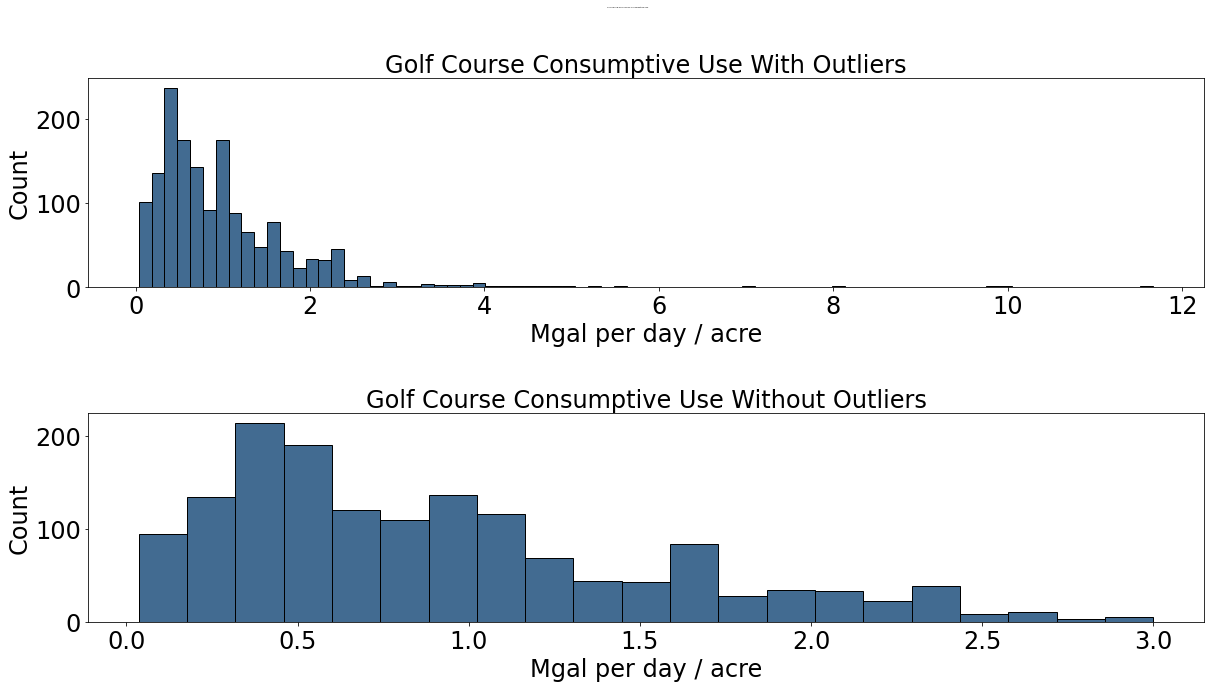

In [18]:
# These are the histograms of golf courses with and without 'outliers'.
# Even with the dropping of extreme values, the model is not 
# normalized.


plt.figure(figsize=[20,10])
plt.suptitle("Comparing Golf Course Consumptive Use", size=2) 
plt.rcParams.update({'font.size': 24})
plt.subplots_adjust(wspace=0.6,
                    hspace=0.6)

plt.subplot(2,1,1)
plt.title("Golf Course Consumptive Use With Outliers", size=24) 
sns.histplot(golf1['golf_con-per_1000_acre'], color='#03396c')
plt.xlabel('Mgal per day / acre');

plt.subplot(2,1,2)
plt.title("Golf Course Consumptive Use Without Outliers", size=24) 
sns.histplot(golf_out3['golf_con-per_1000_acre'], color='#03396c')
plt.xlabel('Mgal per day / acre');

In [77]:
# This is the chosen model without Palm Springs.

y_golf1 = golf_out3["IG-CUsFr"]
X_golf1 = golf_out3[["IG-IrTot"]]
golf_model1 = sm.OLS(y_golf1, sm.add_constant(X_golf1))
golf_results1 = golf_model1.fit()

print(golf_results1.summary())

y_pred_golf1 = golf_results1.predict(sm.add_constant(X_golf1))

print(f"""
Mean Absolute Error:       {mean_absolute_error(y_golf1, y_pred_golf1)}
Mean Squared Error:        {mean_squared_error(y_golf1, 
y_pred_golf1, squared=False)}  
""")

                            OLS Regression Results                            
Dep. Variable:               IG-CUsFr   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     6473.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:29:42   Log-Likelihood:                -1079.9
No. Observations:                1535   AIC:                             2164.
Df Residuals:                    1533   BIC:                             2174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1112      0.014     -7.787      0.0

In [78]:
# This is the chosen model with Palm Springs.  R-squared is higher
# but the errors are larger.

y_golf2 = golf_out2["IG-CUsFr"]
X_golf2 = golf_out2[["IG-IrTot"]]
golf_model2 = sm.OLS(y_golf2, sm.add_constant(X_golf2))
golf_results2 = golf_model2.fit()

print(golf_results2.summary())

y_pred_golf2 = golf_results2.predict(sm.add_constant(X_golf2))

print(f"""
Mean Absolute Error:       {mean_absolute_error(y_golf2, y_pred_golf2)}
Mean Squared Error:        {mean_squared_error(y_golf2,
y_pred_golf2, squared=False)}  
""")

                            OLS Regression Results                            
Dep. Variable:               IG-CUsFr   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     7671.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:32:46   Log-Likelihood:                -1330.7
No. Observations:                1536   AIC:                             2665.
Df Residuals:                    1534   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1817      0.016    -11.036      0.0

## Multiple Linear Regression

The dropping of outliers resulted in both PHDI and precipitation to lose their statistical significance.  Hence, prior to log scaling, the only variable that was kept was maximum temperature.  The R-Squared of the model with maximum temperature was .820 which is an improvement on the model that didn't have its presence (.808).  Every acre of irrigated golf course was associated with a 1.20 Mgal/d consumptive use of water.  Every degree increase in maximum temperature was associated with a 0.0163 Mgal/d consumptive use of water.

In [21]:
# Before outliers were dropped, all of the variables were statistically 
# significant.

y_golf2 = golf1["IG-CUsFr"]
X_golf2 = golf1[["IG-IrTot", "Max_temp", "Precip", "PHDI"]]
golf_model2 = sm.OLS(y_golf2, sm.add_constant(X_golf2))
golf_results2 = golf_model2.fit()

print(golf_results2.summary())

                            OLS Regression Results                            
Dep. Variable:               IG-CUsFr   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     679.1
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:28:39   Log-Likelihood:                -3067.9
No. Observations:                1578   AIC:                             6146.
Df Residuals:                    1573   BIC:                             6173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8325      0.378     -4.843      0.0

In [22]:
# The dropping of the outliers caused PHDI and precipitation to 
# lose their statistical significance.

y_golf3 = golf_out3["IG-CUsFr"]
X_golf3 = golf_out3[["IG-IrTot", "Max_temp", "Precip", "PHDI"]]
golf_model3 = sm.OLS(y_golf3, sm.add_constant(X_golf3))
golf_results3 = golf_model3.fit()
print(golf_results3.summary())

                            OLS Regression Results                            
Dep. Variable:               IG-CUsFr   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1748.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:28:39   Log-Likelihood:                -1030.3
No. Observations:                1535   AIC:                             2071.
Df Residuals:                    1530   BIC:                             2097.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1267      0.109    -10.301      0.0

In [79]:
# Hence, prior to log-scaling, the only variable that was kept
# besides acreage was maximum temperature. 

y_golf4 = golf_out3["IG-CUsFr"]
X_golf4 = golf_out3[["IG-IrTot", "Max_temp"]]
golf_model4 = sm.OLS(y_golf4, sm.add_constant(X_golf4))
golf_results4 = golf_model4.fit()

print(golf_results4.summary())

y_pred_golf4 = golf_results4.predict(sm.add_constant(X_golf4))

print(f"""
Mean Absolute Error:       {mean_absolute_error(y_golf4, y_pred_golf4)}
Mean Squared Error:        {mean_squared_error(y_golf4,
y_pred_golf4, squared=False)} 
""")

                            OLS Regression Results                            
Dep. Variable:               IG-CUsFr   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     3491.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:33:13   Log-Likelihood:                -1032.2
No. Observations:                1535   AIC:                             2070.
Df Residuals:                    1532   BIC:                             2086.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1550      0.106    -10.877      0.0

## Log Scalled Multiple Linear Regression 

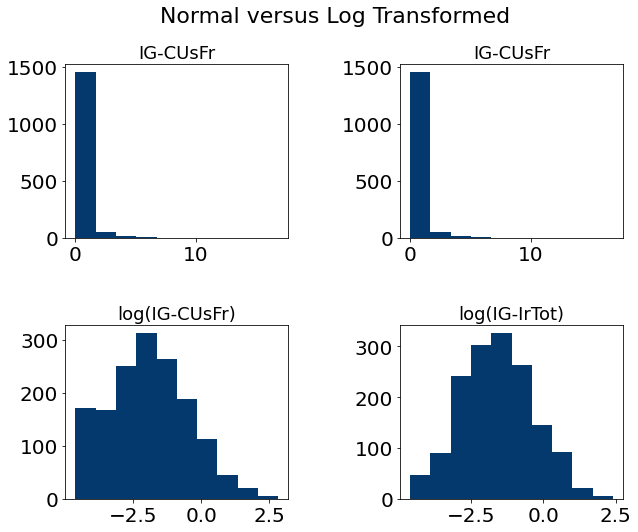

In [24]:
# Normal and Log scaled histograms.

golf_out3["log(IG-IrTot)"] = np.log(golf_out3["IG-IrTot"])
golf_out3["log(IG-CUsFr)"] = np.log(golf_out3["IG-CUsFr"])

plt.figure(figsize=[10,8])
plt.suptitle("Normal versus Log Transformed", size=22) 
plt.subplots_adjust(wspace= 0.5,
                    hspace= 0.5)
plt.rcParams.update({'font.size': 20})
plt.subplot(2,2,1)
plt.hist(golf_out3[["IG-CUsFr"]], color = ['#03396c'])
plt.title('IG-CUsFr', fontsize=18)
plt.subplot(2,2,2)                                                  
plt.hist(golf_out3[['IG-CUsFr']], color = ['#03396c'])
plt.title('IG-CUsFr', fontsize=18)
plt.subplot(2,2,3)
plt.title("log(IG-CUsFr)", fontsize=18)
plt.hist(golf_out3[["log(IG-CUsFr)"]], color = ['#03396c'])
plt.subplot(2,2,4)  
plt.title("log(IG-IrTot)", fontsize=18)
plt.hist(golf_out3[["log(IG-IrTot)"]], color = ['#03396c']);

In [25]:
# This is he log scaled model without outliers that includes maximum temperature
# and PHDI.

y_golf5 = golf_out3[["log(IG-CUsFr)"]]
X_golf5 = golf_out3[["log(IG-IrTot)", "Max_temp", "PHDI"]]
golf_model5 = sm.OLS(y_golf5, sm.add_constant(X_golf5))
golf_results5 = golf_model5.fit()

print(golf_results5.summary())

                            OLS Regression Results                            
Dep. Variable:          log(IG-CUsFr)   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1512.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:28:39   Log-Likelihood:                -1676.8
No. Observations:                1535   AIC:                             3362.
Df Residuals:                    1531   BIC:                             3383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.0817      0.167    -12.437

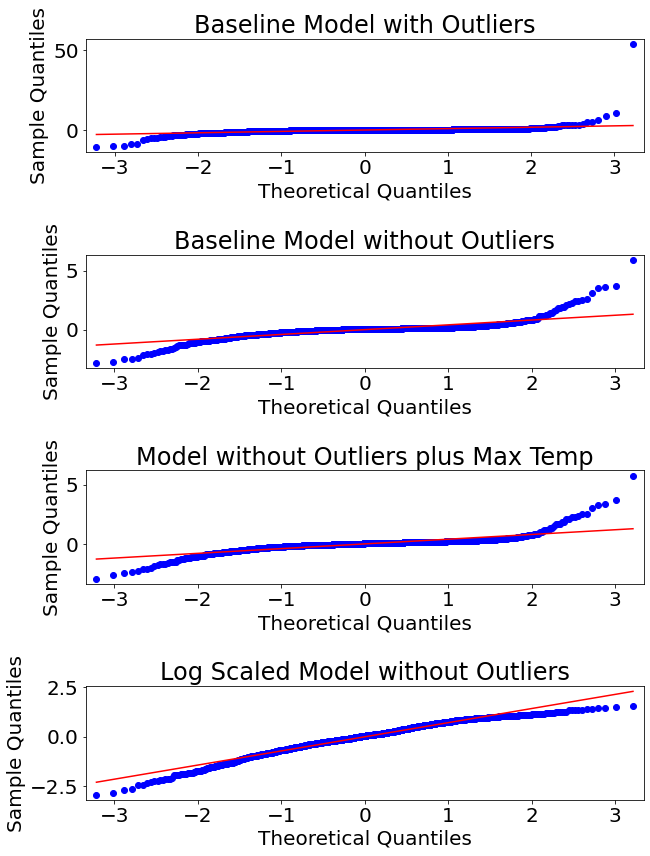

In [26]:
# QQ plots of the various models. The bottom one is the 
# log-scaled model and it shows a marked improvement 
# with non-normal residuals although it is still not ideal.

fig, ax = plt.subplots(nrows = 4, figsize=[10, 14])
plt.rcParams.update({'font.size': 20})
plt.subplots_adjust(wspace= 0.9,
                    hspace= 0.9)

sm.qqplot(golf_results.resid, line = 'r',  ax = ax[0])
ax[0].set_title("Baseline Model with Outliers")
sm.qqplot(golf_results1.resid, line = 'r',  ax = ax[1])
ax[1].set_title("Baseline Model without Outliers")
sm.qqplot(golf_results4.resid, line = 'r',  ax = ax[2])
ax[2].set_title("Model without Outliers plus Max Temp")
sm.qqplot(golf_results5.resid, line = 'r',  ax = ax[3])
ax[3].set_title("Log Scaled Model without Outliers");

# Domestic Water Withdraw

## Domestic Feature Engineering

In [27]:
# This creates a column that tabulates the amount of per capita domestic water
# withdraw for an entire counties population (self-supplied, and public 
# supplied). This can be calculated by multiplying the total domestic water
# withdraw by 1000 and dividing by the total population of the county. Like 
# the other per capita measures, its units are in gal/d.

cleanNOAAUSGSdom['Total_Dom-per_cap'] = (cleanNOAAUSGSdom['DO-WDelv ']*1000) \
/ (cleanNOAAUSGSdom['TP-TotPop'])

In [80]:
# This creates a column that tabulates the population density of a county for 
# the year 2015. It was assumed that a counties land area didn't change between
# the years 2010 and 2015.

cleanNOAAUSGSdom["2015_density"] =  cleanNOAAUSGSdom\
['TP-TotPop'] *1000 / cleanNOAAUSGSdom["area_2010"]

In [81]:
# This shows variability amongst cities and suburbs.   One of the things noticed 
# was that Riverside and San Bernadino County, suburbs of LA, had more domestic 
# per capita water withdraw than LA.  It was hypothesized that this was due to 
# there lesser population density and smaller multi_unit percentage.

cleanNOAAUSGSdom.iloc[[175,189,192],:]\
[['COUNTY', 'STATE', 'Total_Dom-per_cap', 'multi_unit', '2015_density']]

,COUNTY,STATE,Total_Dom-per_cap,multi_unit,2015_density
175,Los Angeles County,CA,80.655501,41.8,2506.306741
189,Riverside County,CA,118.444270,16.1,327.625415
192,San Bernardino County,CA,102.263345,18.8,106.104570


In [83]:
# The largest outlier amongst counties with large populations, Maricopa County,
# Arizona, had higher multi-unit and density percentages than Riverside or San 
# Bernardino so there is more going on.  The fact that it is in the middle of 
# the Sonoran desert doesn't particularly separate it from LA.

cleanNOAAUSGSdom.iloc[[74],:][['COUNTY', 'STATE',\
'Total_Dom-per_cap', 'multi_unit', '2015_density']]

,COUNTY,STATE,Total_Dom-per_cap,multi_unit,2015_density
74,Maricopa County,AZ,154.111845,25.1,453.030823


In [31]:
# The largest outliers for high amounts of per capita water consumption
# are rural counties in the west (with the exception of Pike County, GA).

outlie = cleanNOAAUSGSdom[cleanNOAAUSGSdom['Total_Dom-per_cap'] > 300]
outlie[['COUNTY', 'STATE', 'Total_Dom-per_cap', 'multi_unit', '2015_density']]

,COUNTY,STATE,Total_Dom-per_cap,multi_unit,2015_density
242,Hinsdale County,CO,322.997416,3.6,0.692772
470,Pike County,GA,345.019787,2.9,83.025591
525,Bonneville County,ID,342.450199,17.4,58.994791
527,Butte County,ID,907.636945,11.9,1.120685
528,Camas County,ID,450.281426,0.0,0.992099
534,Custer County,ID,369.464155,4.7,0.830532
536,Franklin County,ID,304.420988,4.3,19.700143
539,Gooding County,ID,406.961528,5.7,20.966569
545,Lemhi County,ID,439.560440,7.6,1.695012
554,Power County,ID,392.259414,5.1,5.446362


In [84]:
# As an areas rurality appears to be a factor, additional columns were created 
# to help assess this.  The variable "Public_water-Percentage" calculated the
# percentage of a counties population that gets its water from the public
# supply. This variable wasn't used due to its high correlation with 
# Public_volume-percentage and has lesser significance.

cleanNOAAUSGSdom["Public_water-Percentage"] = \
(cleanNOAAUSGSdom['PS-TOPop'] / cleanNOAAUSGSdom['TP-TotPop'])*100

In [85]:
# This calculates the percentage of water withdrawn from the public water
# supply as opposed to self-supplied sources such as wells.  This variable
# was used initailly but it dropped out of the model due to issues with 
# multicollinearity.

cleanNOAAUSGSdom["Public_volume-percentage"] = \
(cleanNOAAUSGSdom['DO-PSDel'] / cleanNOAAUSGSdom['DO-WDelv '])*100

In [86]:
# It was observed that certain "metros" had low population density.  For
# this reason, a more robust definition for categorizing areas by density was
# created.  It wasn't used, however, due to issues with multicollinearity.  

def f(cleanNOAAUSGSdom):
    if cleanNOAAUSGSdom['2015_density'] > 1000:
        val = 'Urban'
    elif cleanNOAAUSGSdom['2015_density'] < 100:
        val = 'Rural'
    else:
        val = 'Suburban'
    return val

cleanNOAAUSGSdom['density_category'] = cleanNOAAUSGSdom.apply(f, axis=1)

cleanNOAAUSGSdom = pd.get_dummies(cleanNOAAUSGSdom,\
columns=['density_category'], drop_first=True)

## Domestic Water Withdraw Correlations

In [87]:
# A smaller dataset that only contained the variables needed for an analysis
# of domestic water withdraw was created.  

Domestic_withdraw = cleanNOAAUSGSdom[['STATE', 'COUNTY', 'TP-TotPop',\
'Total_Dom-per_cap', 'DO-WDelv ', 'IR-CUsFr', 'IR-WSWFr', "IR-WFrTo",\
'poverty', 'homeownership', 'multi_unit', 'unemployment_rate', "2015_density",\
'per_capita_income', 'median_hh_income', 'metro_yes', 'median_edu_bachelors',\
'median_edu_below_hs', 'median_edu_hs_diploma','PMDI', 'PHDI', 'PDSI',\
'Precip', 'Min_temp', 'Max_temp', 'Avg_temp', 'Public_water-Percentage',\
"Public_volume-percentage", 'density_category_Urban',\
'density_category_Suburban']]
Domestic_withdraw.head()

,STATE,COUNTY,TP-TotPop,Total_Dom-per_cap,DO-WDelv,IR-CUsFr,IR-WSWFr,IR-WFrTo,poverty,homeownership,multi_unit,unemployment_rate,2015_density,per_capita_income,median_hh_income,metro_yes,median_edu_bachelors,median_edu_below_hs,median_edu_hs_diploma,PMDI,PHDI,PDSI,Precip,Min_temp,Max_temp,Avg_temp,Public_water-Percentage,Public_volume-percentage,density_category_Urban,density_category_Urban,density_category_Suburban,density_category_Suburban
0,AL,Autauga County,55.347,55.829584,3.09,3.52,0.16,3.52,13.7,77.5,7.2,3.86,93.107799,27841.70,55317.0,1,0,0,0,-0.339167,-0.454167,-0.553333,55.11,54.7,76.7,65.7,88.528737,87.702265,0,0,0,0
1,AL,Baldwin County,203.709,73.241732,14.92,58.28,11.11,58.28,11.8,76.7,22.6,3.99,128.136598,27779.85,52562.0,1,0,0,0,-0.339167,-0.454167,-0.553333,67.84,58.7,78.6,68.7,85.861204,85.656836,0,0,1,1
2,AL,Barbour County,26.489,58.137340,1.54,2.96,2.39,2.96,27.2,68.0,11.1,5.90,29.935132,17891.73,33368.0,0,0,0,1,-0.339167,-0.454167,-0.553333,66.26,55.2,77.7,66.5,92.819661,92.207792,0,0,0,0
3,AL,Bibb County,22.583,87.233760,1.97,0.19,0.16,0.19,15.2,82.9,6.6,4.39,36.273250,20572.05,43404.0,1,0,0,1,-0.339167,-0.454167,-0.553333,55.74,52.8,75.2,64.0,92.755613,91.878173,0,0,0,0
4,AL,Blount County,57.673,63.287847,3.65,1.08,0.88,1.08,15.6,82.0,3.7,4.02,89.446013,21367.39,47412.0,1,0,0,1,-0.339167,-0.454167,-0.553333,56.79,52.9,72.0,62.4,77.705339,76.438356,0,0,0,0


In [88]:
# This shows the correlations of all of the variables contained within 
# the dataset initially used for an analysis on domestic water withdraw.
pd.set_option("display.max_columns", None)
Domestic_withdraw.corr()

,TP-TotPop,Total_Dom-per_cap,DO-WDelv,IR-CUsFr,IR-WSWFr,IR-WFrTo,poverty,homeownership,multi_unit,unemployment_rate,2015_density,per_capita_income,median_hh_income,metro_yes,median_edu_bachelors,median_edu_below_hs,median_edu_hs_diploma,PMDI,PHDI,PDSI,Precip,Min_temp,Max_temp,Avg_temp,Public_water-Percentage,Public_volume-percentage,density_category_Urban,density_category_Urban,density_category_Suburban,density_category_Suburban
TP-TotPop,1.000000,-0.034040,0.959107,0.105698,0.035308,0.078448,-0.065468,-0.283079,0.471130,-0.028030,0.332403,0.236643,0.252488,0.310396,0.111963,-0.005417,-0.185099,-0.186309,-0.185909,-0.181328,-0.050854,0.110492,0.081457,0.097164,0.183620,0.177000,0.508155,0.508155,0.143545,0.143545
Total_Dom-per_cap,-0.034040,1.000000,0.035349,0.264793,0.317686,0.298361,0.002032,-0.024396,-0.082653,-0.048626,-0.040552,-0.085661,-0.032478,-0.067787,-0.000396,0.006872,-0.060219,-0.243833,-0.270751,-0.239712,-0.239273,-0.043969,0.057337,0.006029,0.021776,0.077285,-0.055058,-0.055058,-0.104914,-0.104914
DO-WDelv,0.959107,0.035349,1.000000,0.184119,0.082076,0.148568,-0.054205,-0.260642,0.417129,-0.020316,0.267961,0.197302,0.222386,0.288589,0.093677,-0.005281,-0.173410,-0.196923,-0.200390,-0.187705,-0.071781,0.119572,0.104782,0.113463,0.180826,0.177685,0.427031,0.427031,0.147831,0.147831
IR-CUsFr,0.105698,0.264793,0.184119,1.000000,0.654354,0.947217,0.055200,-0.164845,0.035181,0.109349,-0.024833,-0.086341,-0.013527,0.019031,-0.021213,-0.006304,-0.016259,-0.308625,-0.315996,-0.284672,-0.284905,0.002482,0.082198,0.042240,0.067985,0.073645,-0.044886,-0.044886,-0.014547,-0.014547
IR-WSWFr,0.035308,0.317686,0.082076,0.654354,1.000000,0.825581,-0.003814,-0.103807,0.029452,0.018961,-0.025158,-0.030303,0.014578,-0.020355,0.011322,-0.005458,-0.113402,-0.274906,-0.281445,-0.271970,-0.332460,-0.162264,-0.085607,-0.126011,0.012932,0.048578,-0.044051,-0.044051,-0.053994,-0.053994
IR-WFrTo,0.078448,0.298361,0.148568,0.947217,0.825581,1.000000,0.043731,-0.161446,0.031621,0.073807,-0.028830,-0.074530,-0.012938,-0.007282,-0.008472,-0.006895,-0.048279,-0.303207,-0.308392,-0.287013,-0.318695,-0.066839,0.017918,-0.025389,0.054907,0.075152,-0.051283,-0.051283,-0.040246,-0.040246
poverty,-0.065468,0.002032,-0.054205,0.055200,-0.003814,0.043731,1.000000,-0.343339,-0.057643,0.571566,-0.006344,-0.723449,-0.752660,-0.207552,-0.114772,0.054173,0.449552,-0.035251,-0.037790,-0.010679,0.291325,0.377312,0.393570,0.389694,0.077903,0.105850,-0.058221,-0.058221,-0.153372,-0.153372
homeownership,-0.283079,-0.024396,-0.260642,-0.164845,-0.103807,-0.161446,-0.343339,1.000000,-0.678197,-0.058942,-0.326736,0.045319,0.102214,-0.134742,-0.121602,-0.049171,0.121322,0.162106,0.170414,0.142747,0.029336,-0.140393,-0.157924,-0.150644,-0.320604,-0.330596,-0.344321,-0.344321,-0.114678,-0.114678
multi_unit,0.471130,-0.082653,0.417129,0.035181,0.029452,0.031621,-0.057643,-0.678197,1.000000,-0.117061,0.482038,0.396506,0.318891,0.378394,0.260549,-0.000353,-0.370032,-0.171587,-0.161840,-0.183945,-0.077385,-0.069868,-0.136600,-0.103933,0.327883,0.317941,0.534517,0.534517,0.303493,0.303493
unemployment_rate,-0.028030,-0.048626,-0.020316,0.109349,0.018961,0.073807,0.571566,-0.058942,-0.117061,1.000000,-0.022125,-0.473823,-0.451098,-0.089213,-0.105551,0.046820,0.342885,-0.205910,-0.196993,-0.198786,0.186858,0.241801,0.217765,0.232663,-0.038116,-0.025040,-0.049223,-0.049223,-0.061978,-0.061978


In [89]:
# This shows the various high correlations between the variables.  It was 
# immediately apparent that only one of the drought indexes and one of
# the temperature values could be used in order to avoid multicollinearity.
# PHDI was chosen for the drought index due to its higher correlation with
# Total_Dom-per_cap and DO-WDelv.  Max_temp was chosen due to its higher 
# correlation with the aforementioned values and its lower correlation with
# precipitation. 

df=Domestic_withdraw.corr().abs().stack().reset_index().sort_values\
(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']

df.drop_duplicates(inplace=True)
df[(df.cc>.50) & (df.cc <1)]

,cc
pairs,
"(PHDI, PMDI)",0.989113
"(Min_temp, Avg_temp)",0.989008
"(Avg_temp, Max_temp)",0.988333
"(PDSI, PMDI)",0.979514
"(Public_volume-percentage, Public_water-Percentage)",0.967093
"(TP-TotPop, DO-WDelv )",0.959107
"(PHDI, PDSI)",0.956539
"(Min_temp, Max_temp)",0.954993
"(IR-CUsFr, IR-WFrTo)",0.947217


## Net Domestic Water Withdraw Models


## Baseline Model (Net Domestic)

In [90]:
# This prints out of the statistics for the baseline model.

y_net_dom = Domestic_withdraw["DO-WDelv "]
X_net_dom = Domestic_withdraw["TP-TotPop"]
net_dom_model = sm.OLS(y_net_dom, sm.add_constant(X_net_dom))
net_dom_results = net_dom_model.fit()

print(net_dom_results.summary())

y_pred_net = net_dom_results.predict(sm.add_constant(X_net_dom))

print(f"""
Mean Absolute Error:       {mean_absolute_error(y_net_dom, y_pred_net)}
Mean Squared Error:        {mean_squared_error
(y_net_dom, y_pred_net, squared=False)} 
""")

                            OLS Regression Results                            
Dep. Variable:              DO-WDelv    R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 3.563e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:41:03   Log-Likelihood:                -10921.
No. Observations:                3105   AIC:                         2.185e+04
Df Residuals:                    3103   BIC:                         2.186e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2422      0.153     -1.580      0.1

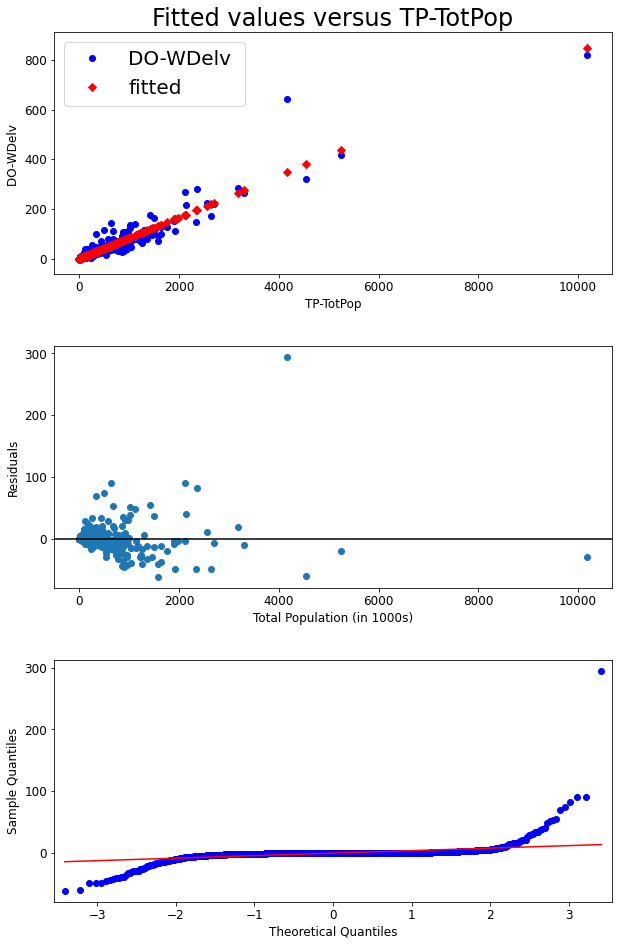

In [91]:
# The top plot shows the predicted values in red versus the actual values in
# blue. The middle plot plots the residuals themselves.  They are being 
# compared to the predicted value which is represented by the black line.  The 
# bottom plot is a qq plot. QQ plots compare the quantiles of the sample 
# (counties in this example) versus theoretical quantiles (often from a normal
# distribution).  All three plots model deviations from the predicted value and
# there is one outlier that clearly stands alone - Maricopa County. while there
# are locations with smaller populations that deviate more on a per capita basis,
# the large population of Maricopa has a significant impact on a model that 
# evaluates net water withdraw.

fig, ax = plt.subplots(nrows = 3, figsize=[10, 16])
plt.rcParams.update({'font.size': 20})
plt.subplots_adjust(wspace= 0.3,
                    hspace= 0.3)

sm.graphics.plot_fit(net_dom_results, "TP-TotPop", ax=ax[0])
ax[1].scatter(Domestic_withdraw["TP-TotPop"], net_dom_results.resid)
ax[1].axhline(y=0, color="black")
ax[1].set_xlabel("Total Population (in 1000s)")
ax[1].set_ylabel("Residuals")
sm.qqplot(net_dom_results.resid, line = 'r', ax = ax[2]);

## Minus Outlier Model (Net Domestic)

In [92]:
# This makes a column called y_pred_net which is the predicted value for y.
# The amount of water withdrawn from a county is then subtracted by 
# Y-pred_net to create a metric that evaluates how far the county 
# deviates from expectations.  Then the maximum value was found
# which was 294.

Domestic_withdraw["y_pred_net"] =  y_pred_net
Domestic_withdraw["domestic_withdraw_error"] = Domestic_withdraw\
["DO-WDelv "] - Domestic_withdraw['y_pred_net']
Domestic_withdraw["domestic_withdraw_error"].max()

Domestic_withdraw2 = Domestic_withdraw.drop(Domestic_withdraw\
[Domestic_withdraw["domestic_withdraw_error"] > 290].index)

In [41]:
# This returns all of the counties with a deviation greater than 
# 290.  There is only one which is shown below.

Domestic_withdraw.loc[Domestic_withdraw["domestic_withdraw_error"] > 290]

,STATE,COUNTY,TP-TotPop,Total_Dom-per_cap,DO-WDelv,IR-CUsFr,IR-WSWFr,IR-WFrTo,poverty,homeownership,multi_unit,unemployment_rate,2015_density,per_capita_income,median_hh_income,metro_yes,median_edu_bachelors,median_edu_below_hs,median_edu_hs_diploma,PMDI,PHDI,PDSI,Precip,Min_temp,Max_temp,Avg_temp,Public_water-Percentage,Public_volume-percentage,density_category_Urban,density_category_Suburban,y_pred_net,domestic_withdraw_error
74,AZ,Maricopa County,4167.947,154.111845,642.33,1006.24,278.95,1232.8,15.7,66.3,25.1,4.17,453.030823,29379.27,58580.0,1,0,0,0,-0.8875,-1.525833,-0.5975,7.89,58.6,85.4,72.0,98.981753,99.132844,0,1,348.228464,294.101536


In [93]:
# This creates a new dataframe that doesn't contain Maricopa County.
Domestic_withdraw2 = Domestic_withdraw.drop(Domestic_withdraw\
[Domestic_withdraw["domestic_withdraw_error"] > 290].index)

In [94]:
# This prints out of the statistics for a model that doesn't
# have the outlier.
Domestic_withdraw2 = Domestic_withdraw.drop(Domestic_withdraw\
[Domestic_withdraw["domestic_withdraw_error"] > 290].index)
y_net_dom2 = Domestic_withdraw2["DO-WDelv "]
X_net_dom2 = Domestic_withdraw2["TP-TotPop"]
net_dom_model2 = sm.OLS(y_net_dom2, sm.add_constant(X_net_dom2))
net_dom_results2 = net_dom_model2.fit()

print(net_dom_results2.summary())

y_pred_net2 = net_dom_results.predict(sm.add_constant(X_net_dom2))

print(f"""
Mean Absolute Error:       {mean_absolute_error(y_net_dom2, y_pred_net2)}
Mean Squared Error:        {mean_squared_error(y_net_dom2,
y_pred_net2, squared=False)}
""")

                            OLS Regression Results                            
Dep. Variable:              DO-WDelv    R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 5.533e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:43:39   Log-Likelihood:                -10016.
No. Observations:                3104   AIC:                         2.004e+04
Df Residuals:                    3102   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0388      0.115      0.338      0.7

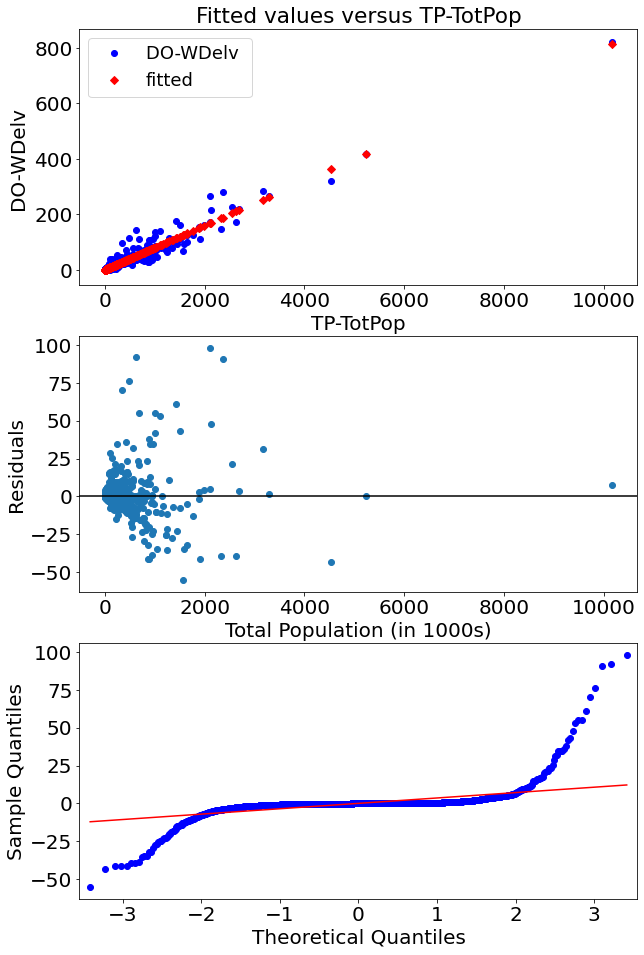

In [44]:
# These are the same plots used before, this time without Maricopa. 
# There is still significant scatter not explained by the model, 
# particularly for values less that 2,000 TP-Top (which is measured 
# in 1000s), but overall the modelling is significantly improved.

fig, ax = plt.subplots(nrows = 3, figsize=[10, 16])
plt.rcParams.update({'font.size': 18})
sm.graphics.plot_fit(net_dom_results2, "TP-TotPop", ax=ax[0])
ax[1].scatter(Domestic_withdraw2["TP-TotPop"], net_dom_results2.resid)
ax[1].axhline(y=0, color="black")
ax[1].set_xlabel("Total Population (in 1000s)")
ax[1].set_ylabel("Residuals")
sm.qqplot(net_dom_results2.resid, line = 'r', ax = ax[2]);

### Attempt to Log Scale

In order to try and normalize the residuals, a log scale model was attempted.  It didn't work.  While Jarque Bera went from 1,059,693 to 3146.262, the difference was likely due to it now being on a log scale considering the p-value remained at 0.00. Log scale models are harder to interpret so this model wasn't used.

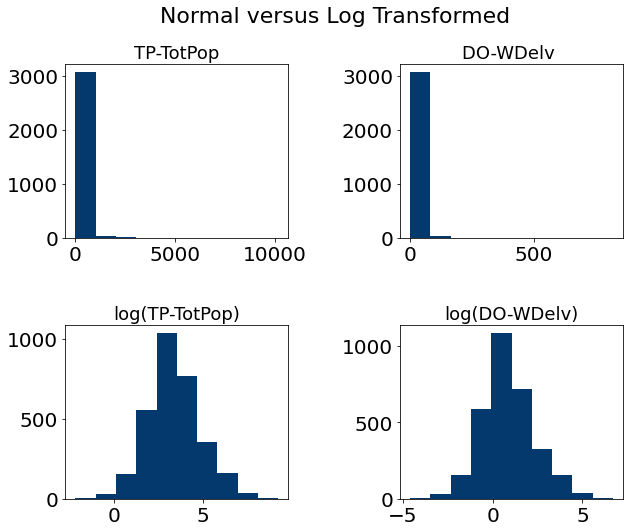

In [45]:
# Normal and Log scaled histograms.

Domestic_withdraw2["log(DO-WDelv)"] = np.log(Domestic_withdraw2["DO-WDelv "])
Domestic_withdraw2["log(TP-TotPop)"] = np.log(Domestic_withdraw2["TP-TotPop"])

plt.figure(figsize=[10,8])
plt.suptitle("Normal versus Log Transformed", size=22) 
plt.subplots_adjust(wspace= 0.5,
                    hspace= 0.5)

plt.rcParams.update({'font.size': 20})
plt.subplot(2,2,1)
plt.hist(Domestic_withdraw2[["TP-TotPop"]], color = ['#03396c'])
plt.title("TP-TotPop", fontsize=18)
plt.subplot(2,2,2)                                                  
plt.hist(Domestic_withdraw2[["DO-WDelv "]], color = ['#03396c'])
plt.title("DO-WDelv ", fontsize=18)
plt.subplot(2,2,3)
plt.title("log(TP-TotPop)", fontsize=18)
plt.hist(Domestic_withdraw2[["log(TP-TotPop)"]], color = ['#03396c'])
plt.subplot(2,2,4)  
plt.title("log(DO-WDelv)", fontsize=18)
plt.hist(Domestic_withdraw2[["log(DO-WDelv)"]], color = ['#03396c']);

In [46]:
# This prints the results of the model after the variables were 
# transformed.  JB's probability sill remained at 0.00, hence log 
# scaling didn't solve the problem.

y_net_dom3 = Domestic_withdraw2["log(DO-WDelv)"]
X_net_dom3 = Domestic_withdraw2["log(TP-TotPop)"]
net_dom_model3 = sm.OLS(y_net_dom3, sm.add_constant(X_net_dom3))
net_dom_results3 = net_dom_model3.fit()

print(net_dom_results3.summary())

                            OLS Regression Results                            
Dep. Variable:          log(DO-WDelv)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 5.240e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:28:41   Log-Likelihood:                -1091.1
No. Observations:                3104   AIC:                             2186.
Df Residuals:                    3102   BIC:                             2198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.3923      0.015   -154.

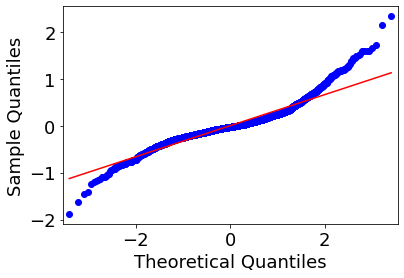

In [47]:
# This is a QQ plot of the log scaled model.  While it is
# straighter, this may just be due to everything now being on a 
# log scale rather than any enhancement in model performance.

plt.rcParams.update({'font.size': 18})
sm.qqplot(net_dom_results3.resid, line = 'r');

### Attempts to Add More Vddariables.

Adding additional variables to the model was also attempted but the strength of the correlation between population and water withdraw meant that multicollinearity was essentially inevitable whenever any other variable was added into the model.  A good example of this was max_temp.  It only had a 0.08% correlation with total population, but it still showed up as having strong multicollinearity.  It also had virtually no effect on the model’s performance.  For such reasons, adding more variables to the net domestic water withdraw model was abandoned.

In [48]:
y_net_dom4 = Domestic_withdraw2["DO-WDelv "]
X_net_dom4 = Domestic_withdraw2[["TP-TotPop", "Max_temp"]]
net_dom_model4 = sm.OLS(y_net_dom4, sm.add_constant(X_net_dom4))
net_dom_results4 = net_dom_model4.fit()

print(net_dom_results4.summary())

                            OLS Regression Results                            
Dep. Variable:              DO-WDelv    R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 2.798e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:28:41   Log-Likelihood:                -9999.1
No. Observations:                3104   AIC:                         2.000e+04
Df Residuals:                    3101   BIC:                         2.002e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2796      0.917     -5.760      0.0

## Per Capita Domestic Water Withdraw Models

## Baseline Model (Per Capita Domestic)

Irrigation with fresh surface-water was the variable chosen for the baseline per capita model.  

In [95]:
# This prints out of the statistics for the baseline model.

y_percap_dom = Domestic_withdraw["Total_Dom-per_cap"]
X_percap_dom = Domestic_withdraw["IR-WSWFr"]
percap_dom_model = sm.OLS(y_percap_dom, sm.add_constant(X_percap_dom))
percap_dom_results = percap_dom_model.fit()
print(percap_dom_results.summary())

y_pred_percap =  percap_dom_results.predict(sm.add_constant(X_percap_dom))
print(f"""
Mean Absolute Error:       {mean_absolute_error(y_percap_dom, y_pred_percap)}
Mean Squared Error:        {mean_squared_error(y_percap_dom, 
y_pred_percap, squared=False)}
""")

                            OLS Regression Results                            
Dep. Variable:      Total_Dom-per_cap   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     348.3
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           9.28e-74
Time:                        11:44:21   Log-Likelihood:                -15955.
No. Observations:                3105   AIC:                         3.191e+04
Df Residuals:                    3103   BIC:                         3.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6984      0.762    108.591      0.0

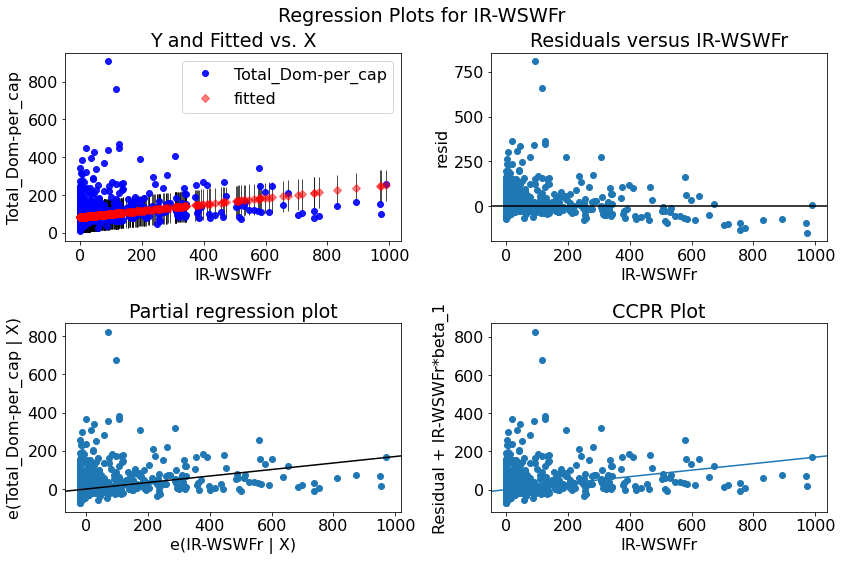

In [50]:
# The top two plots, Y and fitted vs. X and Residuals versus "IR-WSWFr"
# are ones seen before with the net withdraw models.  As can be seen,
# there are several outliers that are having an impact on the model.
# The next two plots, partial regression and CCPR, are really only used 
# with multiple linear regression.  It is ok to ignore them for now.  This 
# format was used so one has a reference point to look to once multiple
# linear regression models are created.

plt.rcParams.update({'font.size': 16})
sm.graphics.plot_regress_exog(percap_dom_results, "IR-WSWFr", fig=plt.figure(figsize=(12, 8)));

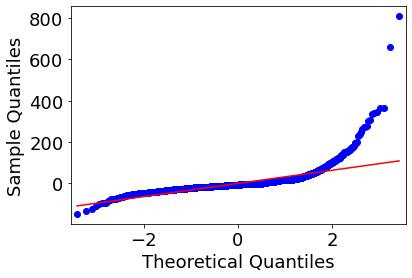

In [51]:
# This is the qq polt.  Clearly there still some non-normal residuals, mostly at 
# the high end.

plt.rcParams.update({'font.size': 18})
sm.qqplot(percap_dom_results.resid, line = 'r');

## Minus Outlier Model (Per Capita)

Efforts to remove more outliers than 175 domestic per capita error continually failed.  Most of the time, the r-squared went down.  The R-squared could go up by removing a bunch of counties but then one is essentially cherry-picking the data and losing a lot of information that may be important.  If (as was the case) most of the counties were the ones that are most impacted by variables such as drought or heat, then essentially what one would be doing by eliminating too many counties is developing a model for counties that are not as impacted by said conditions which was not the intention.  Hence, a surgical approach was adopted.  The end result is a fairly weak model but one that attempts to understand the impacts of weather and demographic factors on domestic water consumption for the vast majority of counties.

In [96]:
# This makes a column called y_pred_percap which is the predicted value for y.
# The domestic per capita use of a county is then subtracted by y_pred_percap
# to create a metric that evaluates how far the county deviates from
# expectations.  The highest value was 809 gallons per day. After exploring
# the data, a domestic error greater than 175 appeared to make the
# most sense as it retained most of the data and it improved model performance.

Domestic_withdraw["y_pred_percap"] =  y_pred_percap
Domestic_withdraw["domestic-percapita_error"] = Domestic_withdraw\
["Total_Dom-per_cap"] - Domestic_withdraw["y_pred_percap"]
Domestic_withdraw["domestic-percapita_error"].max()
Domestic_percap_out = Domestic_withdraw.drop(Domestic_withdraw\
[Domestic_withdraw["domestic-percapita_error"] > 175].index)

In [53]:
# The lowest value was -147.
Domestic_withdraw["domestic-percapita_error"].min()

-147.81698815922363

In [97]:
# The following are the counties left out of the dataset.  Most are
# rural and in the west, Pike County, GA, Talbot, GA, and Davis County, Utah
# being the exceptions.

per_capita_outlier =  Domestic_withdraw[Domestic_withdraw\
["domestic-percapita_error"] > 175]

per_capita_outlier[['COUNTY', 'STATE', 'Total_Dom-per_cap',\
'domestic-percapita_error', '2015_density']]

,COUNTY,STATE,Total_Dom-per_cap,domestic-percapita_error,2015_density
218,Archuleta County,CO,284.164508,194.351820,9.148410
242,Hinsdale County,CO,322.997416,236.857507,0.692772
470,Pike County,GA,345.019787,262.125866,83.025591
486,Talbot County,GA,276.155910,193.457530,16.191012
527,Butte County,ID,907.636945,809.339459,1.120685
528,Camas County,ID,450.281426,345.983367,0.992099
534,Custer County,ID,369.464155,273.858339,0.830532
539,Gooding County,ID,406.961528,272.227018,20.966569
545,Lemhi County,ID,439.560440,341.733953,1.695012
554,Power County,ID,392.259414,276.511128,5.446362


In [55]:
# This shows the number of counties excluded from the dataset - 23.
len(per_capita_outlier)

23

In [98]:
# This drops the outliers from the dataset.
Domestic_percap_out = Domestic_withdraw.drop(Domestic_withdraw\
[Domestic_withdraw["domestic-percapita_error"] > 175].index)

In [99]:
# This prints out the results from the model without outliers.

y_percap_dom2 = Domestic_percap_out["Total_Dom-per_cap"]
X_percap_dom2 = Domestic_percap_out["IR-WSWFr"]
percap_dom_model2 = sm.OLS(y_percap_dom2, sm.add_constant(X_percap_dom2))
percap_dom_results2 = percap_dom_model2.fit()

print(percap_dom_results2.summary())

y_pred_percap2 =  percap_dom_results2.predict(sm.add_constant(X_percap_dom2))

print(f"""
Mean Absolute Error:       {mean_absolute_error(y_percap_dom2 , y_pred_percap2)}
Mean Squared Error:        {mean_squared_error
(y_percap_dom2, y_pred_percap2, squared=False)}
""")

                            OLS Regression Results                            
Dep. Variable:      Total_Dom-per_cap   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     548.3
Date:                Fri, 30 Sep 2022   Prob (F-statistic):          9.66e-112
Time:                        11:46:32   Log-Likelihood:                -14776.
No. Observations:                3082   AIC:                         2.956e+04
Df Residuals:                    3080   BIC:                         2.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.7755      0.541    149.256      0.0

In [100]:
# One could drop more outliers based on Total_Dom_per_cap
# but this reduces R-squared

Domestic_percap_out2 =  Domestic_percap_out.drop(Domestic_percap_out\
[Domestic_percap_out["Total_Dom-per_cap"] > 200].index)
y_percap_tdom2 = Domestic_percap_out2["Total_Dom-per_cap"]
X_percap_tdom2 = Domestic_percap_out2["IR-WSWFr"]
percap_dom_tmodel2 = sm.OLS(y_percap_tdom2, sm.add_constant(X_percap_tdom2))
percap_dom_tresults2 = percap_dom_tmodel2.fit()

print(percap_dom_tresults2.summary())

                            OLS Regression Results                            
Dep. Variable:      Total_Dom-per_cap   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     294.4
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           4.67e-63
Time:                        11:47:19   Log-Likelihood:                -13920.
No. Observations:                3033   AIC:                         2.784e+04
Df Residuals:                    3031   BIC:                         2.786e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.5482      0.443    179.415      0.0

In [101]:
# One can remove some lower values but this only has a marginal effect.

Domestic_percap_out3 = Domestic_percap_out.drop(Domestic_percap_out\
[Domestic_percap_out["Total_Dom-per_cap"] < 30].index)

y_percap_tdom3 = Domestic_percap_out3["Total_Dom-per_cap"]
X_percap_tdom3 = Domestic_percap_out3["IR-WSWFr"]
percap_dom_tmodel3 = sm.OLS(y_percap_tdom3, sm.add_constant(X_percap_tdom3))
percap_dom_tresults3 = percap_dom_tmodel3.fit()

print(percap_dom_tresults3.summary())

                            OLS Regression Results                            
Dep. Variable:      Total_Dom-per_cap   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     551.5
Date:                Fri, 30 Sep 2022   Prob (F-statistic):          2.81e-112
Time:                        11:47:32   Log-Likelihood:                -14688.
No. Observations:                3068   AIC:                         2.938e+04
Df Residuals:                    3066   BIC:                         2.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.0481      0.539    150.409      0.0

In [102]:
# One can remove a bunch of values which helps R-squared but then one is removing too 
# much of the data.

Domestic_percap_out4 = Domestic_percap_out.drop(Domestic_percap_out\
[Domestic_percap_out["domestic-percapita_error"] > 40].index)

y_percap_tdom4 = Domestic_percap_out4["Total_Dom-per_cap"]
X_percap_tdom4 = Domestic_percap_out4["IR-WSWFr"]
percap_dom_tmodel4 = sm.OLS(y_percap_tdom4, sm.add_constant(X_percap_tdom4))
percap_dom_tresults4 = percap_dom_tmodel4.fit()

print(percap_dom_tresults4.summary())

                            OLS Regression Results                            
Dep. Variable:      Total_Dom-per_cap   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     583.2
Date:                Fri, 30 Sep 2022   Prob (F-statistic):          1.67e-117
Time:                        11:47:43   Log-Likelihood:                -12381.
No. Observations:                2886   AIC:                         2.477e+04
Df Residuals:                    2884   BIC:                         2.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.9548      0.336    226.013      0.0

In [61]:
len(Domestic_percap_out[Domestic_percap_out["domestic-percapita_error"] > 40])

196

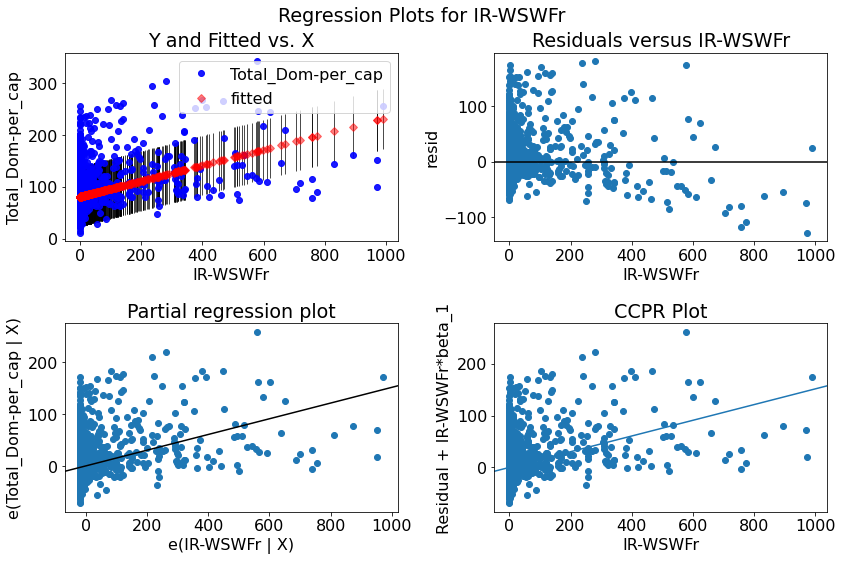

In [103]:
# This is still simple linear regression so the top two plots are the
# ones of interest (and the others are reference points for later).
# The removal of the outliers does improve the plotting but there 
# are still a lot of datapoints outside of the expected ranges. 

plt.rcParams.update({'font.size': 16})
sm.graphics.plot_regress_exog(percap_dom_results2, "IR-WSWFr",\
fig=plt.figure(figsize=(12, 8)));

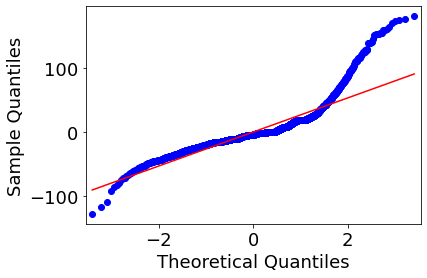

In [63]:
# The QQ plot confirms that there is still a problem with nonnormal 
# residuals, mostly at the high end.

plt.rcParams.update({'font.size': 18})
sm.qqplot(percap_dom_results2.resid, line = 'r');

## Minus Outlier Multiple Linear Regression (Per Capita)

In [64]:
# This prints out the results from a multiple regression model where poverty
# was kept.  Its statistical significance was .249 which is above .05% and 
# is not statistically significant.  It had been lower prior to the dropping
# of outliers.

y_percap_dom3 = Domestic_percap_out["Total_Dom-per_cap"]
initial_x_percap_dom3 = Domestic_percap_out[['IR-WSWFr', 'multi_unit',
'metro_yes', 'PHDI', 'Max_temp', 'Precip', "poverty", 'unemployment_rate']]
percap3_model = sm.OLS(y_percap_dom3, sm.add_constant(initial_x_percap_dom3))
percap3_results = percap3_model.fit()
print(percap3_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Total_Dom-per_cap   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     135.3
Date:                Fri, 30 Sep 2022   Prob (F-statistic):          5.20e-195
Time:                        11:28:43   Log-Likelihood:                -14563.
No. Observations:                3082   AIC:                         2.914e+04
Df Residuals:                    3073   BIC:                         2.920e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                52.2260      4.73

In [104]:
# This is the multiple regression model being used.  The dropping of poverty
# from the model didn't harm the R-squared.


y_percap_dom3 = Domestic_percap_out["Total_Dom-per_cap"]
x_percap_dom3 = Domestic_percap_out[['IR-WSWFr',  'multi_unit',
'metro_yes', 'PHDI', 'Max_temp', 'Precip', 'unemployment_rate']]
percap3_model = sm.OLS(y_percap_dom3, sm.add_constant(x_percap_dom3))
percap3_results = percap3_model.fit()
print(percap3_results.summary())


y_pred_percap3 = percap3_results.predict(sm.add_constant(x_percap_dom3))
print(f"""
Mean Absolute Error:       {mean_absolute_error(y_percap_dom3 , y_pred_percap3)}
Mean Squared Error:        {mean_squared_error(y_percap_dom3, 
y_pred_percap3, squared=False)}
""")

                            OLS Regression Results                            
Dep. Variable:      Total_Dom-per_cap   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 30 Sep 2022   Prob (F-statistic):          7.81e-196
Time:                        11:48:29   Log-Likelihood:                -14564.
No. Observations:                3082   AIC:                         2.914e+04
Df Residuals:                    3074   BIC:                         2.919e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                50.8366      4.58

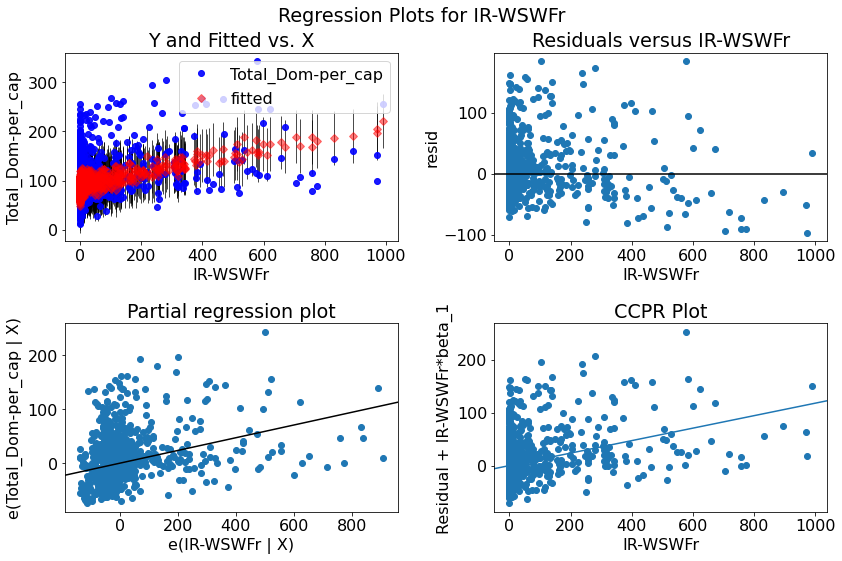

In [105]:
# This is multiple linear regression so now all four plots are relevant.
# The same variable, IR-WSWFr, is being plotted.  More of the datapoints
# are in the expected range of the fitted model although many still remain 
# outside of it.  The residuals are more centered but there is still 
# significant deviation from the predicted value.  What is being plotted
# on the x-axis for a partial regression plot is the part of IR-WSWFr
# not explained by the rest of the model and the y-axis is the total 
# domestic per capita water use not explained by the rest of the model.  
# A non-zero slope is desired and IR-WSWFr has one.  The CCPR plot is 
# a scatter plot with IR-WSWFr on the x-axis and the residuals plus 
# IR-WSWFr times its coefficient on the y-axis. Again, one is looking 
# for a non-zero slope.

plt.rcParams.update({'font.size': 16})
sm.graphics.plot_regress_exog(percap3_results, "IR-WSWFr",\
fig=plt.figure(figsize=(12, 8)));

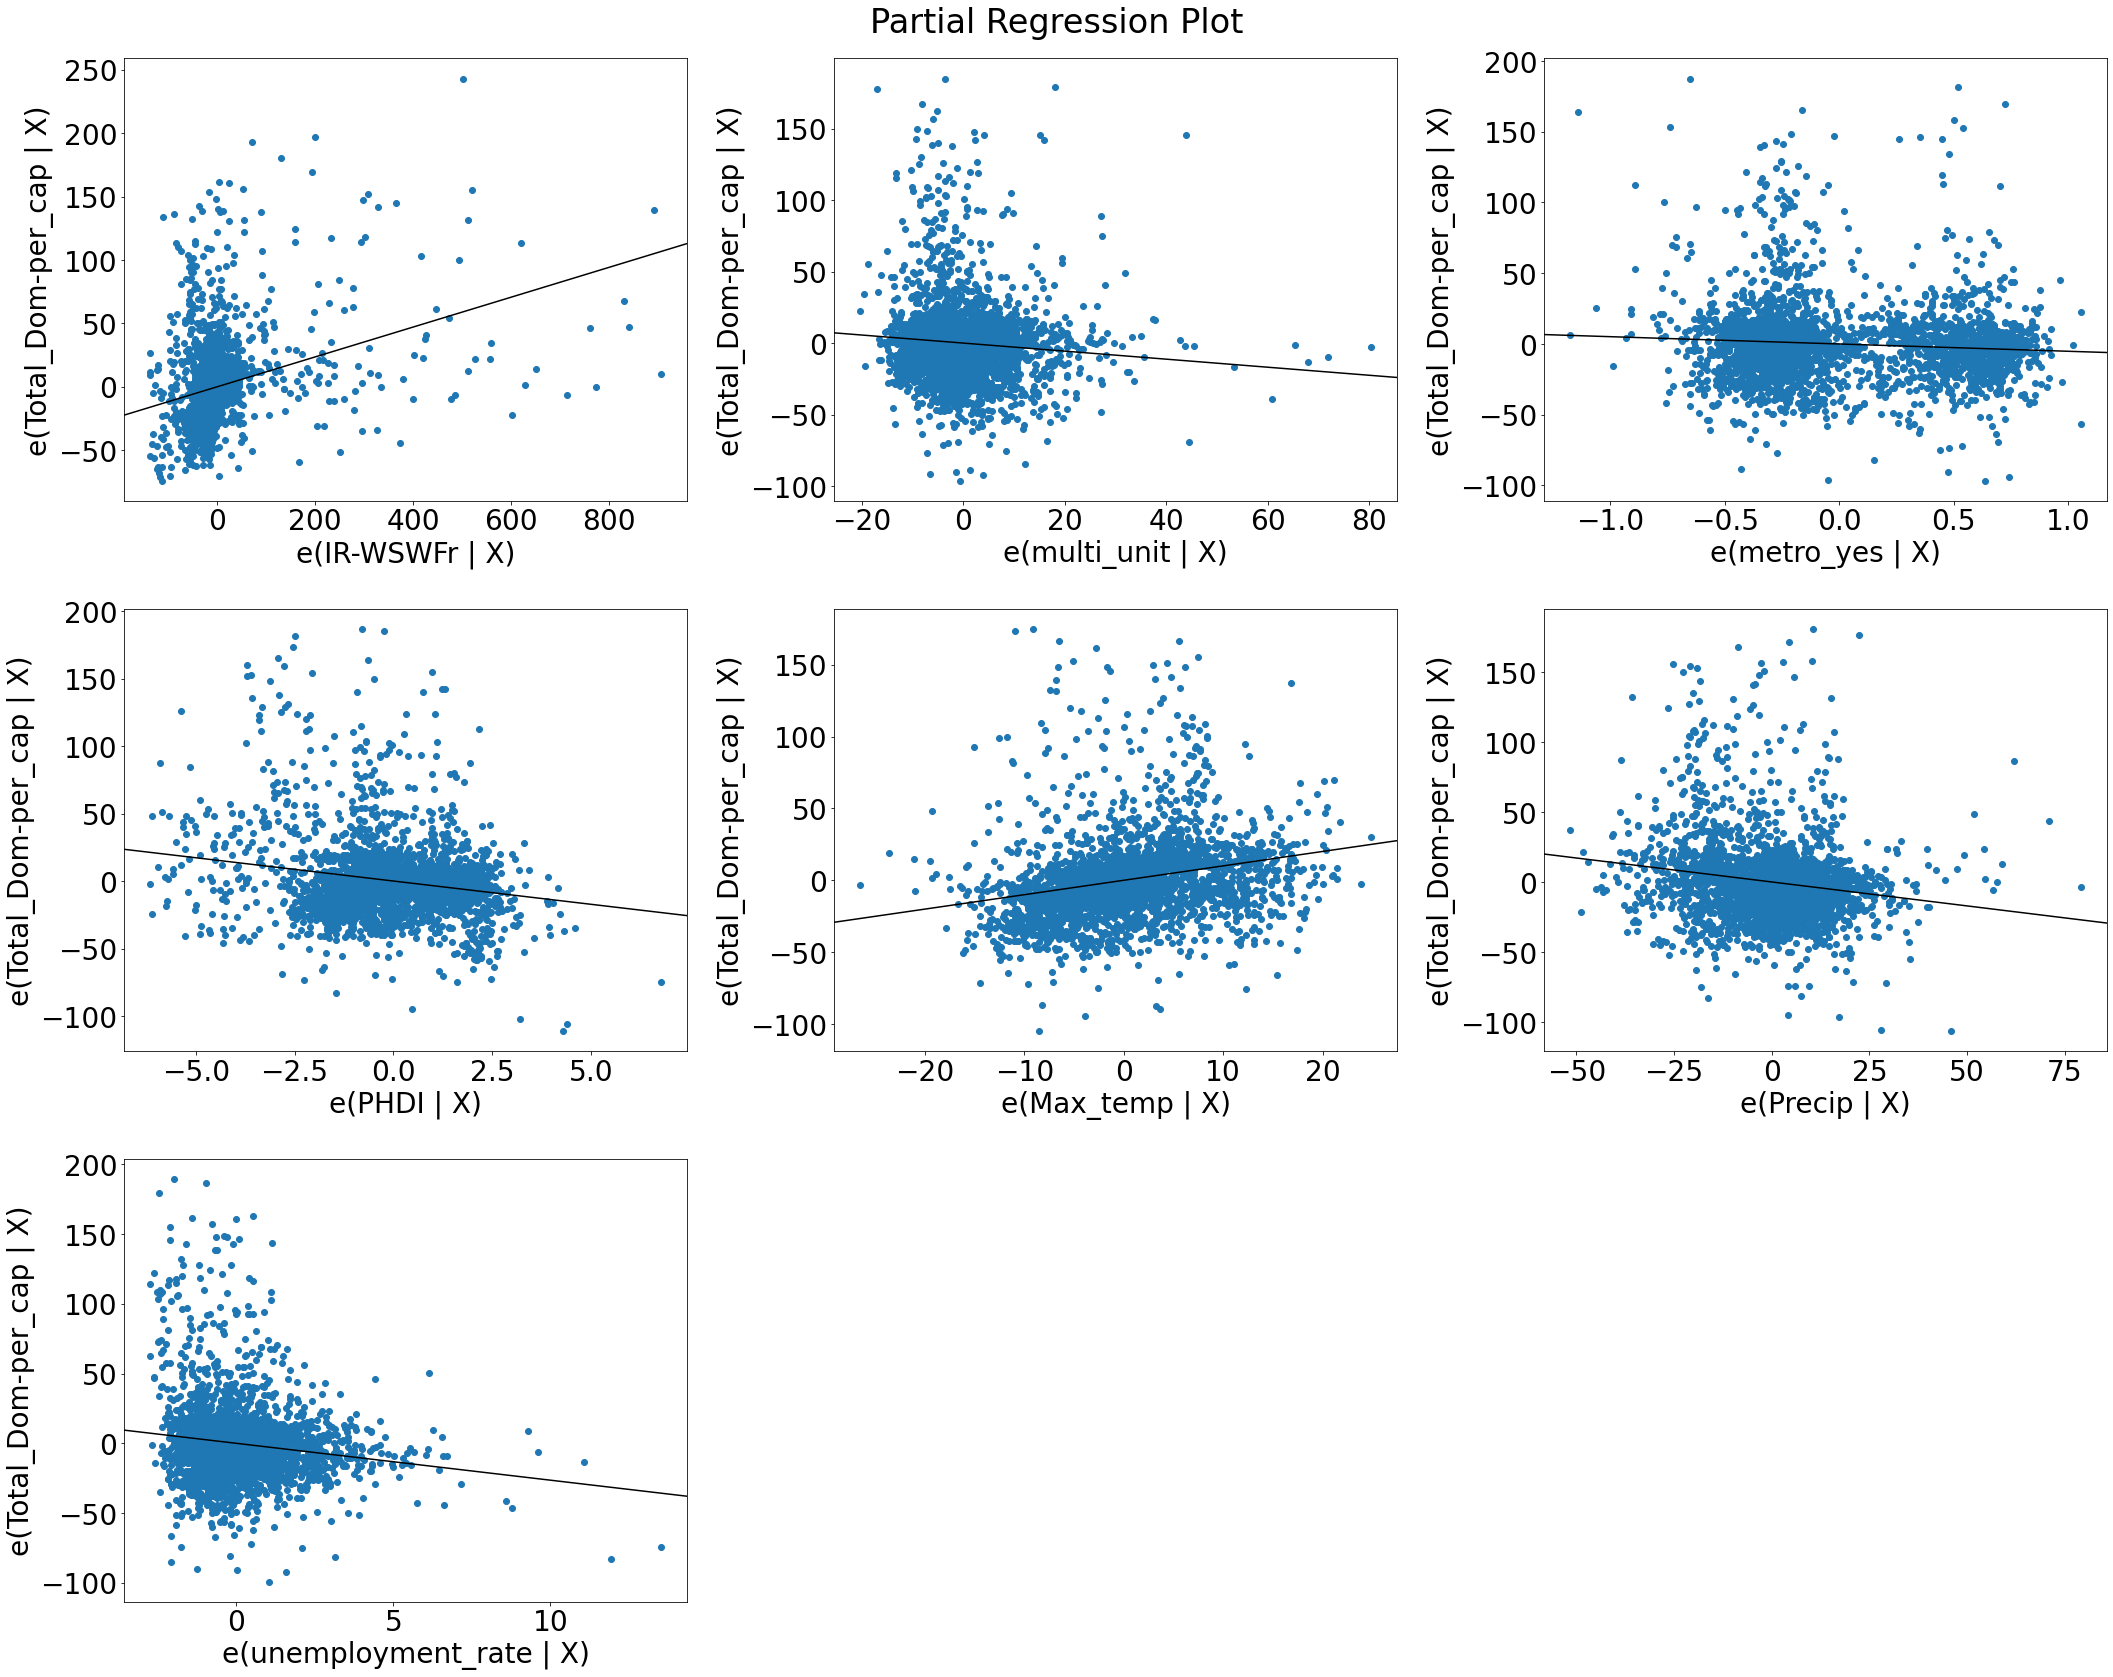

In [67]:
# These are partial regression plots for all of the variables
# being used.  All of them have non-zero slopes.

fig = plt.figure(figsize=(30,24))
plt.rcParams.update({'font.size': 28})
sm.graphics.plot_partregress_grid(
    percap3_results,
    exog_idx=list(x_percap_dom3.columns.values),
    grid=(3,3),
    fig=fig)
plt.show()

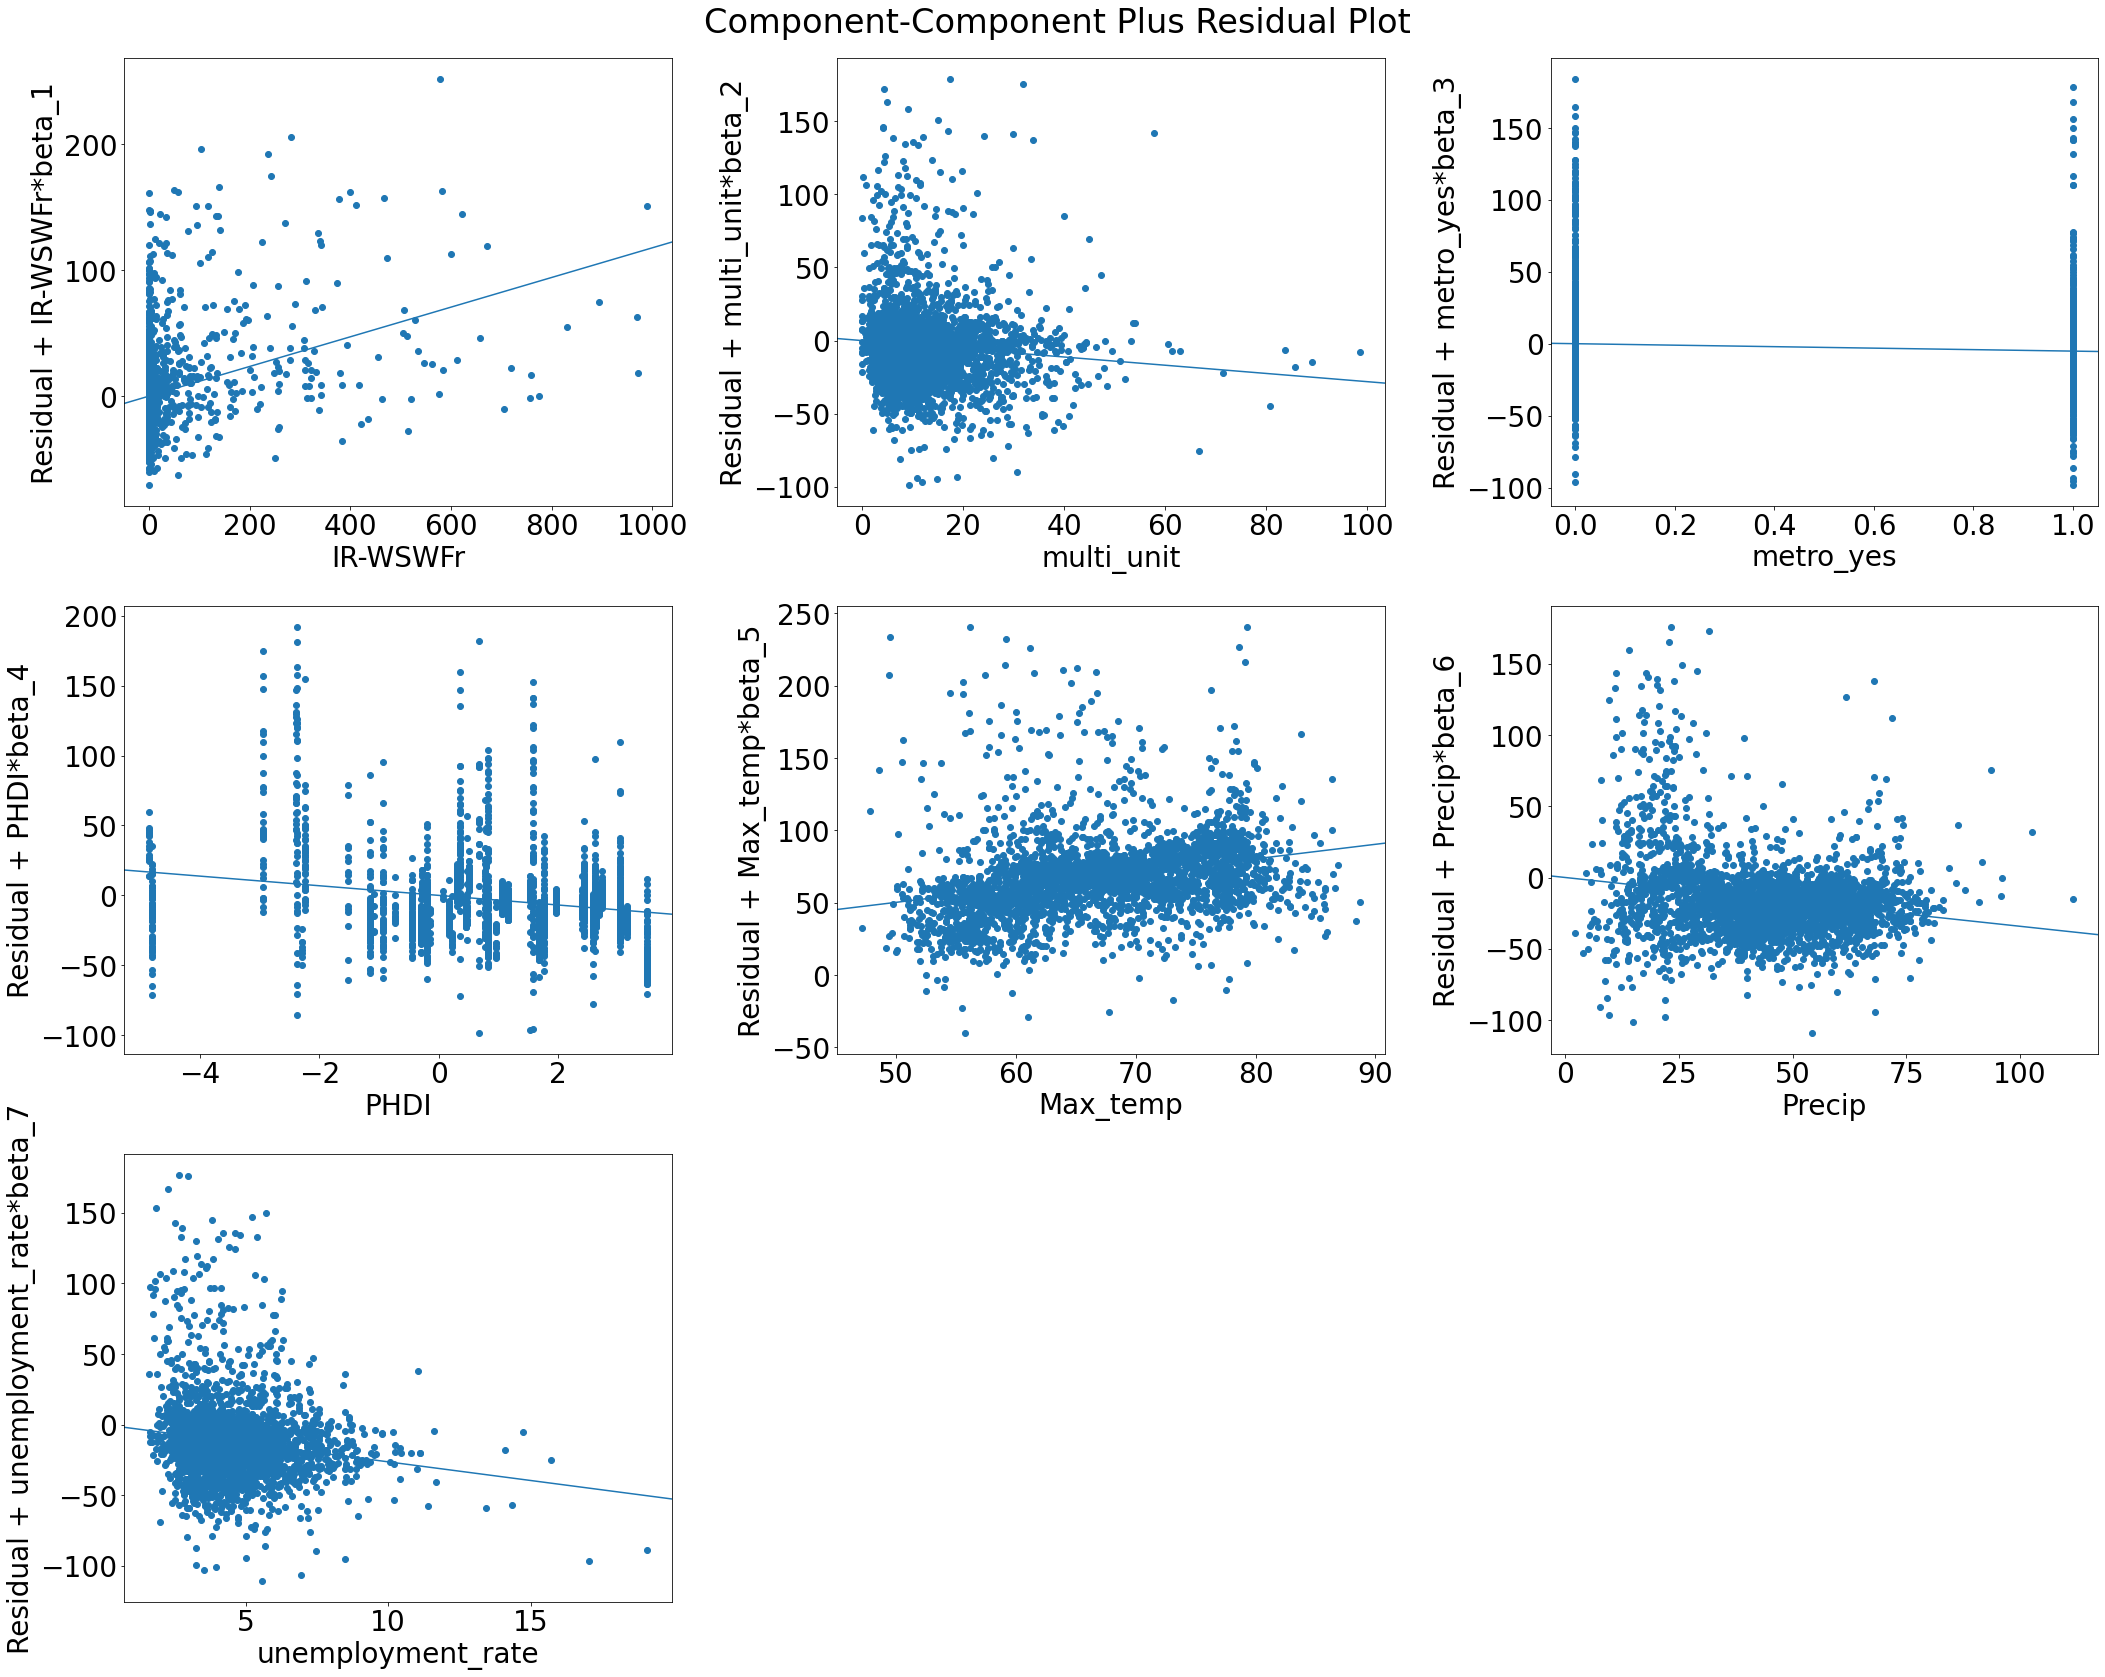

In [68]:
# These are the CCPR plots for all of the variables
# being used. The discrete lines in metro-yes and PHDI
# is because they are categorical values. 

fig = plt.figure(figsize=(30,24))
plt.rcParams.update({'font.size': 28})
sm.graphics.plot_ccpr_grid(
    percap3_results,
    exog_idx=list(x_percap_dom3.columns.values),
    grid=(3,3),
    fig=fig)
plt.show()

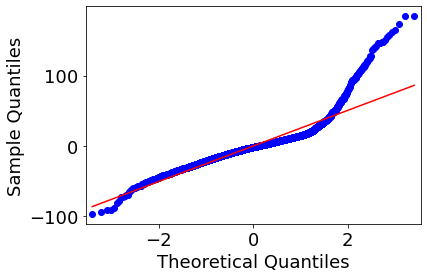

In [69]:
# This is the qq plot for the model.  This confirms that there
# is still a problem with nonnormal residuals.

plt.rcParams.update({'font.size': 18})
sm.qqplot(percap3_results.resid, line = 'r');

In [70]:
# This standardizes the model.

X_standardized = x_percap_dom3.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) \
                            / X_standardized[col].std()

In [71]:
# These are the standardized results.

standardized_model = sm.OLS(y_percap_dom3, sm.add_constant(X_standardized))
standardized_results = standardized_model.fit()
standardized_results.params

const                83.688618
IR-WSWFr              9.575124
multi_unit           -2.590768
metro_yes            -2.498793
PHDI                 -6.040542
Max_temp              8.014957
Precip               -5.682165
unemployment_rate    -4.138645
dtype: float64

### Minus Outlier Multiple Linear Regression (Per Capita)with Transformed Values

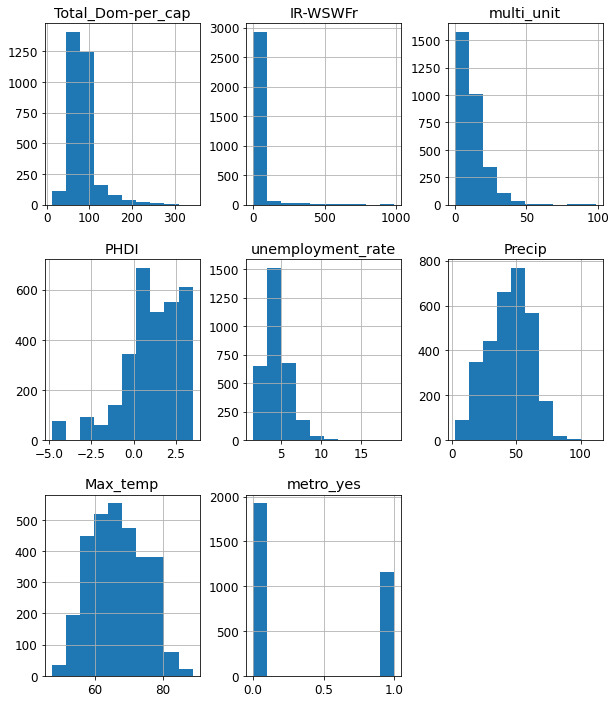

In [106]:
# This shows histograms for the variables before they were transformed.  

plt.rcParams.update({'font.size': 12})
Domestic_percap_out[["Total_Dom-per_cap", 'IR-WSWFr', 'multi_unit', 'PHDI',\
'unemployment_rate', 'Precip', 'Max_temp', 'metro_yes']].hist(figsize=(10, 12));

In [107]:
# This converts the various variables to their transformed values.  Several of 
# the variables contained zeroes which can't be 'logged' so they had to be 
# converted to nan values and then converted back to zeros as stats models 
# doesn't like nan values.
 
Domestic_percap_out["log(percap)"] = np.log\
(Domestic_percap_out[["Total_Dom-per_cap"]])
Domestic_percap_out["log(surf)"] = np.log\
(Domestic_percap_out["IR-WSWFr"].replace(0, np.nan))
Domestic_percap_out["log(surf1)"] = (Domestic_percap_out\
["log(surf)"].replace(np.nan, 0))
Domestic_percap_out["log(multi)"] = np.log\
(Domestic_percap_out["multi_unit"].replace(0, np.nan))
Domestic_percap_out["log(multi1)"] = (Domestic_percap_out\
["log(multi)"].replace(np.nan, 0))
Domestic_percap_out["log(PHDI)"] = np.log\
(Domestic_percap_out["PHDI"].replace(0, np.nan))
Domestic_percap_out["log(PHDI1)"] = (Domestic_percap_out\
["log(PHDI)"].replace(np.nan, 0))
Domestic_percap_out["log(employ)"] = np.log\
(Domestic_percap_out["unemployment_rate"])

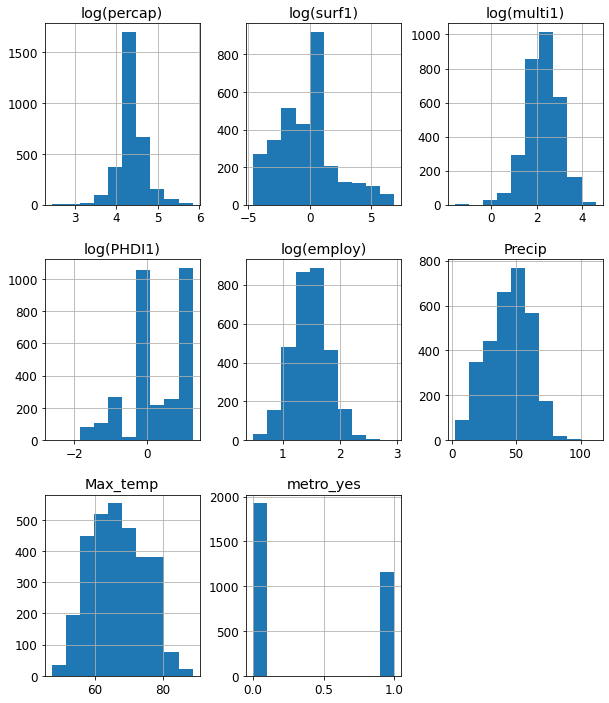

In [108]:
# This shows histograms for the variables after they were transformed.

plt.rcParams.update({'font.size': 12})
Domestic_percap_out[["log(percap)", "log(surf1)", "log(multi1)","log(PHDI1)",\
"log(employ)", 'Precip','Max_temp', 'metro_yes']].hist(figsize=(10, 12));

In [109]:
# This prints out a result with using the transformed values.  The 
# Jarque-Bera (JB) probability remains low. 

y_percap_dom4 = Domestic_percap_out["log(percap)"]
x_percap_dom4 = Domestic_percap_out[['log(surf1)', 'log(multi1)', "PHDI",\
"log(employ)", 'Precip', 'Max_temp', 'metro_yes', ]]
percap4_model = sm.OLS(y_percap_dom4, sm.add_constant(x_percap_dom4))
percap4_results = percap4_model.fit()
print(percap4_results.summary())

                            OLS Regression Results                            
Dep. Variable:            log(percap)   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     150.4
Date:                Fri, 30 Sep 2022   Prob (F-statistic):          2.40e-191
Time:                        11:52:47   Log-Likelihood:                -429.28
No. Observations:                3082   AIC:                             874.6
Df Residuals:                    3074   BIC:                             922.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0971      0.054     76.327      